# Australia - House Pricing Data - Surprise Housing Group

## This notebook is divided into 4 sections

### 1. Data Inspection and Drawing Inferences
### 2. Exploratory Data Analysis and Insights
### 3. Model Building and Analysis
### 4. Subjective Question Solutions

Note : On using model_cv.best_params_  Value of alpha for Ridge regression  is changing every time I run the code,
    I have taken the value as 1.0 for alpha and answered the questions in the subjective part. 

# 1 Data Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_colwidth = 20
pd.pandas.set_option('display.max_columns', None)

### Reading CSV File

In [2]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Shape

In [4]:
# Checking shape of data
housing.shape

(1460, 81)

### Stastical Parameters

In [5]:
# Checking Statistical Parameters
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Info, Null and Data Types

In [6]:
# Checking info and datatypes
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### `It can be seen that there are 43 Categorical columns, 35 Int and 3 float columns`

### Checking Null Values

In [7]:
# Sorting Null Values in Descending order
housing.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [8]:
# Checking null % of columns > 10% misiing
missing = pd.DataFrame(housing.isnull().mean() * 100)
missing[missing[0] > 10].sort_values(by = 0, ascending = False)


,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726


####  `We can see ['PoolQC', 'MiscFeature', 'Alley', 'Fence'] have > 80% null Values, so dropping them `

In [9]:
# Dropping Columns > 45% missing Values
housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1, inplace = True)
housing.shape

(1460, 77)

In [10]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


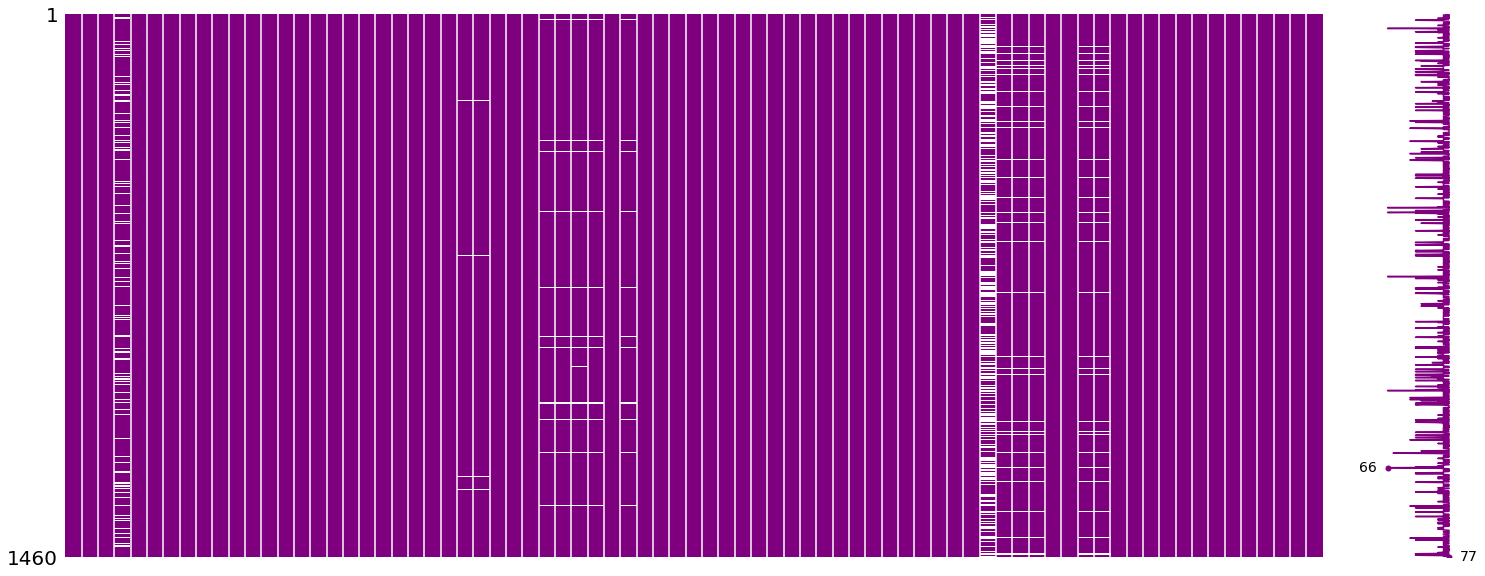

In [11]:
#Viewing Missing Values in Dataframe
# Missing values are seen in white color in each column
msno.matrix(housing,color = (0.5, 0.0, 0.5))

In [12]:
# Checking Columns with Missing Values
new_missing = pd.DataFrame(housing.isnull().mean() * 100)
new_missing[new_missing[0] > 0].sort_values(by = 0, ascending = False)

,0
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945
GarageCond,5.547945
BsmtExposure,2.602740
BsmtFinType2,2.602740
BsmtQual,2.534247


### Checking Data Dictionary to get better Understanding


In [13]:
new_missing[new_missing[0] > 0].sort_values(by = 0, ascending = False).index

Index(['FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure',
       'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
       'MasVnrArea', 'Electrical'],
      dtype='object')

In [14]:
housing['FireplaceQu'].fillna('NoFire', inplace = True)

In [15]:
housing['FireplaceQu'].value_counts()

NoFire    690
Gd        380
TA        313
Fa         33
Ex         24
Po         20
Name: FireplaceQu, dtype: int64

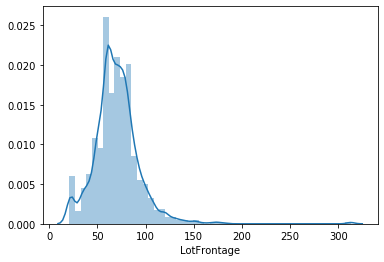

In [16]:
sns.distplot(housing['LotFrontage'].dropna())

In [17]:
housing['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [18]:
# Replacing Null with mean
housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace = True)

In [19]:
housing['LotFrontage'].mean()

70.04995836802642

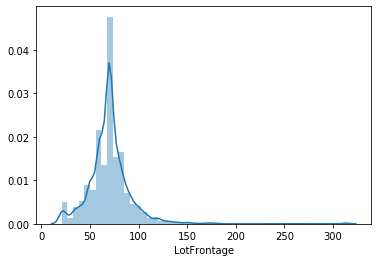

In [20]:
sns.distplot(housing['LotFrontage'])

In [21]:
housing['GarageType'].fillna('NoGarage', inplace = True)

In [22]:
housing['GarageType'].value_counts()

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [23]:
# Comparing year built and Garage year built
housing[['YearBuilt', 'GarageYrBlt']][housing['GarageYrBlt'].notna()].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,90,91,92,93,94,95,96,97,98,100,101,102,103,104,105,106,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,126,128,129,130,131,132,133,134,135,136,137,138,139,141,142,143,144,145,146,147,149,150,151,152,153,154,156,157,158,159,160,161,162,164,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,199,200,201,202,203,204,205,206,207,208,209,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,242,243,244,245,246,247,248,249,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,288,289,290,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,376,377,378,379,380,381,382,383,384,385,387,388,389,390,391,392,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,432,433,435,436,437,438,439,440,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,521,522,523,524,525,526,527,529,530,531,532,534,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,615,616,617,618,619,621,622,623,624,625,626,627,628,629,630,631,632,633,634,637,639,640,641,642,643,644,645,646,647,648,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,706,707,708,709,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,739,740,741,742,743,744,745,746,747,748,749,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,943,944,945,946,947,948,949,950,951,952,953,955,956,957,958,959,961,962,963,964,965,966,967,969,971,972,973,974,975,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1010,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,10

#### `Comparing YearBuilt with GarageYrBlt is almost similar so dropping garage year built`

In [24]:
# YearBuilt != GarageYrBlt
housing[['YearBuilt', 'GarageYrBlt']][housing['YearBuilt'] != housing['GarageYrBlt']]

,YearBuilt,GarageYrBlt
3,1915,1998.0
15,1929,1991.0
26,1951,2005.0
27,2007,2008.0
29,1927,1920.0
...,...,...
1445,1966,1990.0
1448,1910,1950.0
1449,1970,NaN
1450,1974,NaN


#### `Making New column of GarageYearBuiltYear and replacing missing year with yearbuilt`

In [25]:
housing['GarageYrBltYear'] = np.where(housing['GarageYrBlt'].isnull() == True, housing['YearBuilt'], housing['GarageYrBlt'])

In [26]:
housing['GarageYrBltYear'].min()

1872.0

In [27]:
# House built year which is not equal to Garage built year
housing[['YearBuilt', 'GarageYrBlt', 'GarageYrBltYear' ]][housing['YearBuilt'] != housing['GarageYrBlt']]

,YearBuilt,GarageYrBlt,GarageYrBltYear
3,1915,1998.0,1998.0
15,1929,1991.0,1991.0
26,1951,2005.0,2005.0
27,2007,2008.0,2008.0
29,1927,1920.0,1920.0
...,...,...,...
1445,1966,1990.0,1990.0
1448,1910,1950.0,1950.0
1449,1970,NaN,1970.0
1450,1974,NaN,1974.0


In [28]:
housing.drop('GarageYrBlt', axis = 1, inplace = True)

In [29]:
# Replacing Missing with 'NoGar'
housing['GarageFinish'].fillna('NoGar', inplace = True)

In [30]:
housing['GarageFinish'].value_counts()

Unf      605
RFn      422
Fin      352
NoGar     81
Name: GarageFinish, dtype: int64

In [31]:
# Replacing Missing with 'NoGar'
housing['GarageQual'].fillna('NoGar', inplace = True)
housing['GarageQual'].value_counts()

TA       1311
NoGar      81
Fa         48
Gd         14
Ex          3
Po          3
Name: GarageQual, dtype: int64

In [32]:
# Replacing Missing with 'NoGar'
housing['GarageCond'].fillna('NoGar', inplace = True)
housing['GarageCond'].value_counts()

TA       1326
NoGar      81
Fa         35
Gd          9
Po          7
Ex          2
Name: GarageCond, dtype: int64

In [33]:
# Replacing Missing with 'NoBase'
housing['BsmtExposure'].fillna('NoBase', inplace = True)
housing['BsmtExposure'].value_counts()

No        953
Av        221
Gd        134
Mn        114
NoBase     38
Name: BsmtExposure, dtype: int64

In [34]:
# Replacing Missing with 'NoBase'
housing['BsmtFinType2'].fillna('NoBase', inplace = True)
housing['BsmtFinType2'].value_counts()

Unf       1256
Rec         54
LwQ         46
NoBase      38
BLQ         33
ALQ         19
GLQ         14
Name: BsmtFinType2, dtype: int64

In [35]:
# Replacing Missing with 'NoBase'
housing['BsmtQual'].fillna('NoBase', inplace = True)
housing['BsmtQual'].value_counts()

TA        649
Gd        618
Ex        121
NoBase     37
Fa         35
Name: BsmtQual, dtype: int64

In [36]:
# Replacing Missing with 'NoBase'
housing['BsmtCond'].fillna('NoBase', inplace = True)
housing['BsmtCond'].value_counts()

TA        1311
Gd          65
Fa          45
NoBase      37
Po           2
Name: BsmtCond, dtype: int64

In [37]:
# Replacing Missing with 'NoBase'
housing['BsmtFinType1'].fillna('NoBase', inplace = True)
housing['BsmtFinType1'].value_counts()

Unf       430
GLQ       418
ALQ       220
BLQ       148
Rec       133
LwQ        74
NoBase     37
Name: BsmtFinType1, dtype: int64

In [38]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [39]:
# Replacing null with mode ie None
housing['MasVnrType'].fillna('None', inplace = True)
housing['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [40]:
housing['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [41]:
housing['MasVnrArea'].fillna(0.0, inplace= True)

In [42]:
housing['MasVnrArea'].isnull().sum()

0

In [43]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [44]:
housing['Electrical'].fillna('SBrkr', inplace = True)

### ReChecking Null Values

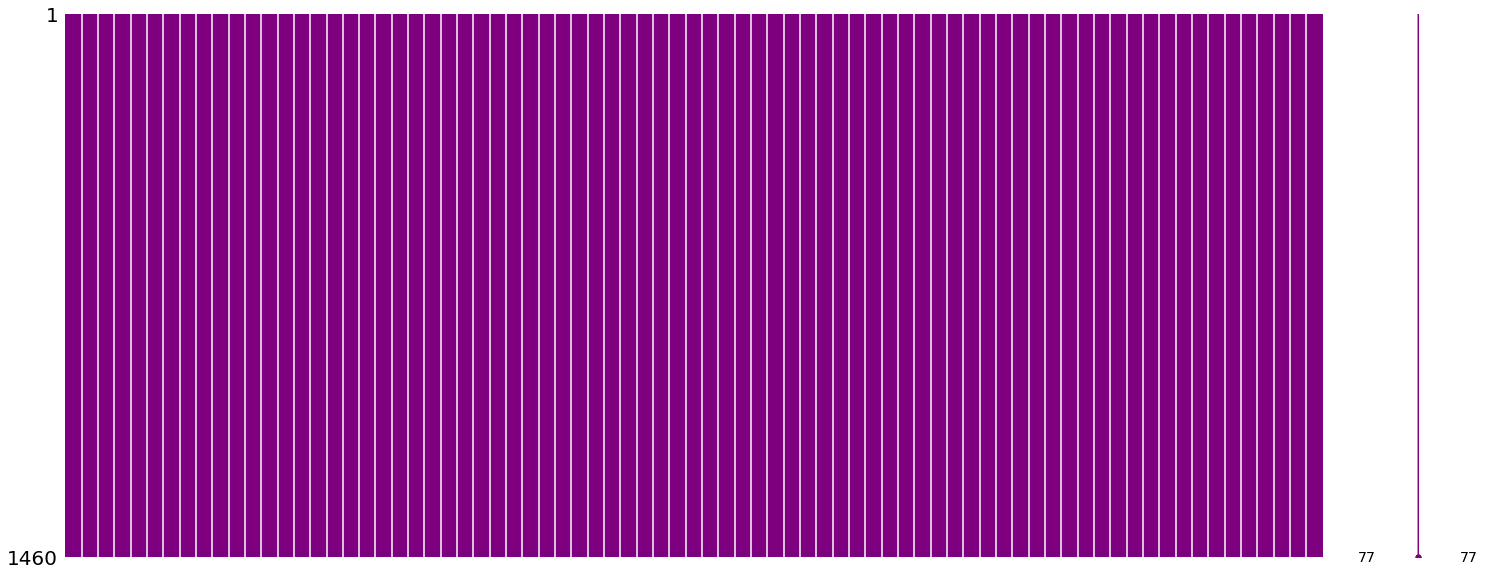

In [45]:
msno.matrix(housing,color = (0.5, 0.0, 0.5))

In [46]:
housing.shape

(1460, 77)

### All 1460 rows are retained after treating null values

In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotFrontage      1460 non-null   float64
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   LotShape         1460 non-null   object 
 7   LandContour      1460 non-null   object 
 8   Utilities        1460 non-null   object 
 9   LotConfig        1460 non-null   object 
 10  LandSlope        1460 non-null   object 
 11  Neighborhood     1460 non-null   object 
 12  Condition1       1460 non-null   object 
 13  Condition2       1460 non-null   object 
 14  BldgType         1460 non-null   object 
 15  HouseStyle       1460 non-null   object 
 16  OverallQual      1460 non-null   int64  
 17  OverallCond   

### Checking Categorical Columns

In [48]:
# Checking Value Counts of Object columns
cols = list(housing.columns)
for i in cols:
    if housing[i].dtype == 'object':
        print(housing[i].value_counts(normalize = True)*100)
        print(housing[i].unique())
        print('*'*30)

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
['RL' 'RM' 'C (all)' 'FV' 'RH']
******************************
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
['Pave' 'Grvl']
******************************
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
['Reg' 'IR1' 'IR2' 'IR3']
******************************
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
['Lvl' 'Bnk' 'Low' 'HLS']
******************************
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
['AllPub' 'NoSeWa']
******************************
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
******************************
Gtl    94.657534
Mod     4.452055
Sev    

Name: SaleType, dtype: float64
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
******************************
Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
******************************


In [49]:
# Selecting Highly skewed Columns > 80%
to_drop = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 
 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond',  'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
 'Functional',  'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

housing.drop(to_drop, axis = 1, inplace = True)
housing.shape

(1460, 55)

# EDA

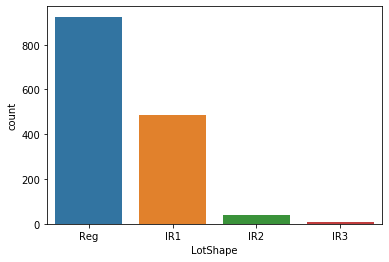

**************************************************


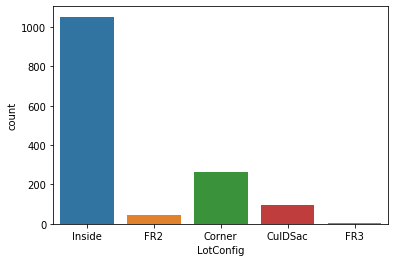

**************************************************


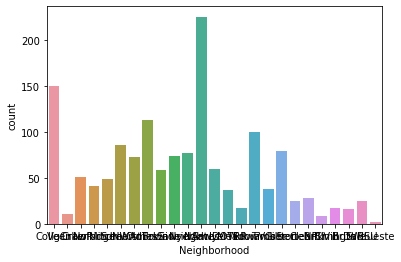

**************************************************


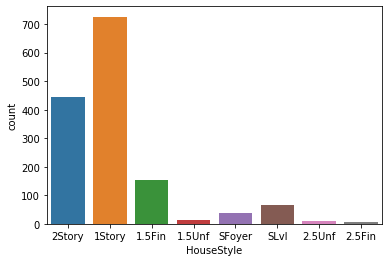

**************************************************


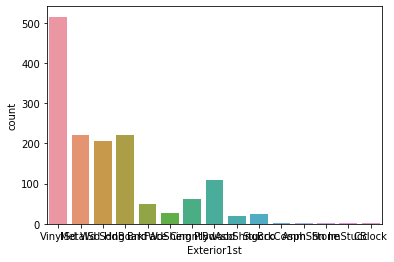

**************************************************


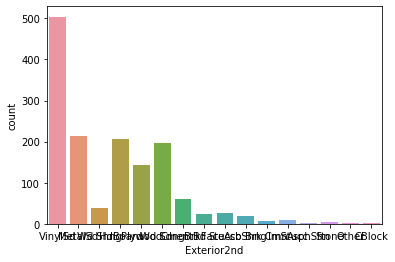

**************************************************


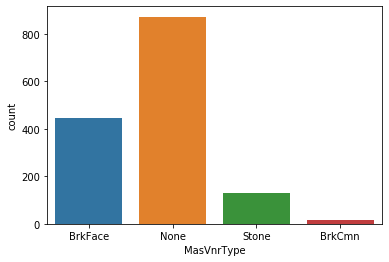

**************************************************


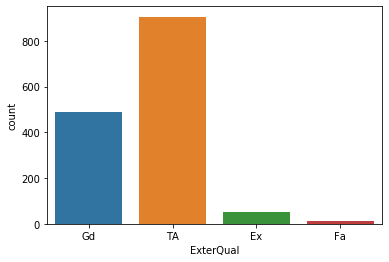

**************************************************


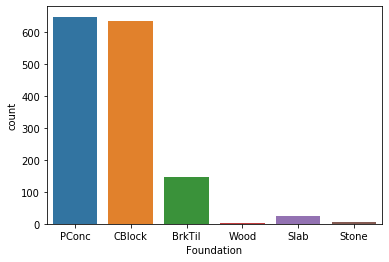

**************************************************


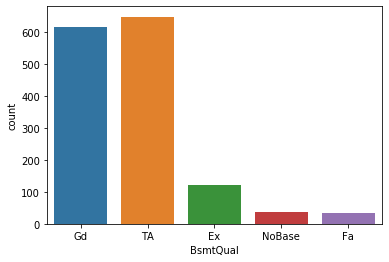

**************************************************


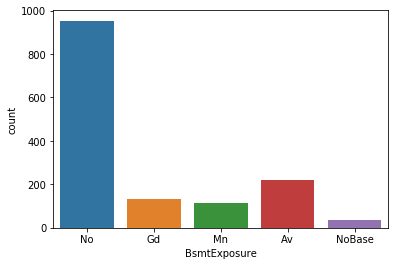

**************************************************


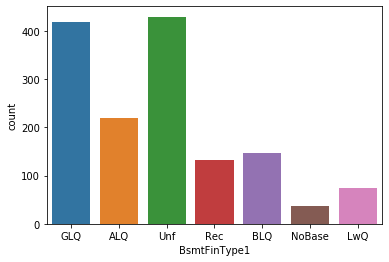

**************************************************


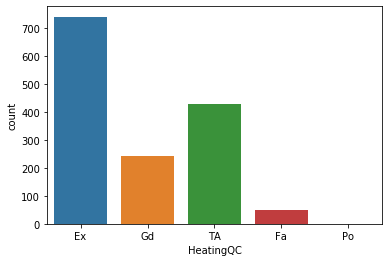

**************************************************


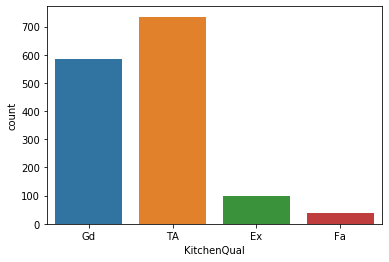

**************************************************


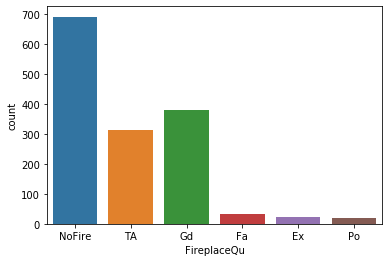

**************************************************


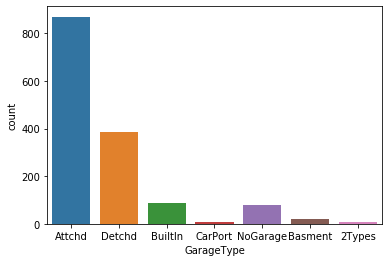

**************************************************


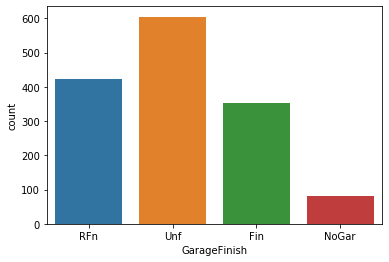

**************************************************


In [50]:
# Plotting Categorical Columns
cols2 = list(housing.columns)
for i in cols2:
    if housing[i].dtype == 'object':
        plt.figure(figsize = (6,4))
        sns.countplot(i, data = housing)
        plt.show()
        print('*'*50)


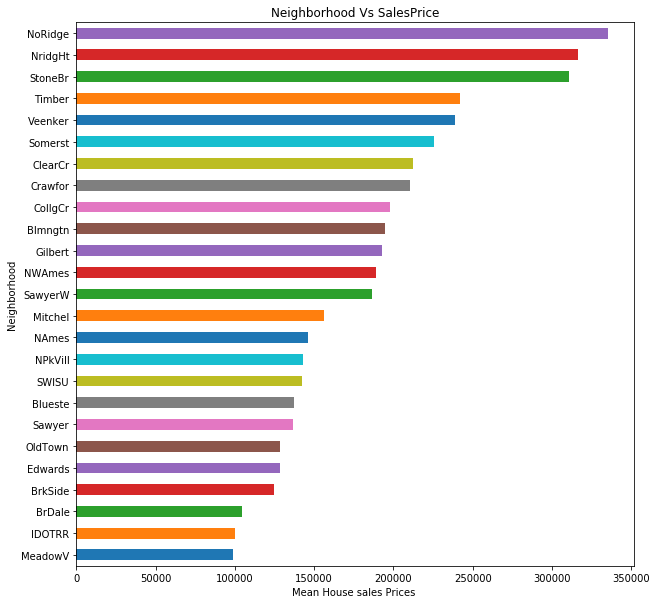

In [51]:
housing.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = True)[:].plot.barh(color=['C0','C1', 'C2','C3','C4', 'C5','C6','C7', 'C8', 'C9'], figsize = (10, 10))
plt.xlabel("Mean House sales Prices ")
plt.title("Neighborhood Vs SalesPrice")
plt.show()

### From this plot we can see that Noridge has higher price house and MeadowV has lowest pice houses. So to make a good name in the market they should buy higher price houses in the top 5 Neighbourhoods.
1. NoRidge
2. NridgHt
3. StoneBr
4. Timber
5. Veenker

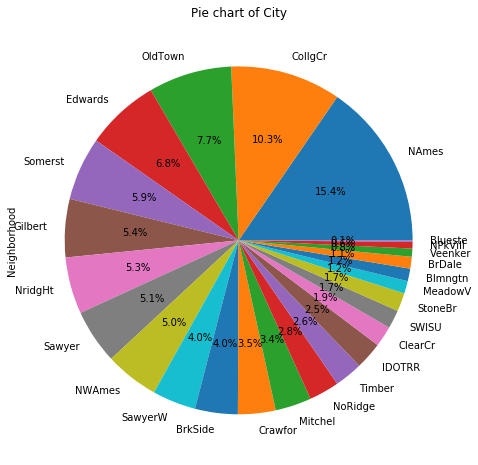

In [52]:
plt.figure(figsize = (12,8))
housing['Neighborhood'].value_counts().plot.pie(autopct='%1.1f%%' )
plt.title("Pie chart of City")
plt.show()

### It can be seen that NoRidge has only 2.8% in the dataset yet its mean prices are at the top.


In [53]:
housing.groupby(['Neighborhood','SalePrice']).mean()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  \
Neighborhood SalePrice                                                          
Blmngtn      159895      983.0        20.0    43.000000   3182.0          7.0   
             160200      791.0       120.0    43.000000   3182.0          7.0   
             167240      220.0       120.0    43.000000   3010.0          7.0   
             172500      444.0       120.0    53.000000   3922.0          7.0   
             174000     1127.0       120.0    53.000000   3684.0          7.0   
...                        ...         ...          ...      ...          ...   
Veenker      245500      401.0       120.0    38.000000  14963.0          8.0   
             270000      765.0       120.0    30.000000   9549.0          8.0   
             294000     1254.0        60.0    70.049958  17542.0          7.0   
             324000      327.0       120.0    32.000000  10846.0          8.0   
             385000       54.0        20.0    68.000000  50271.0          9.0   

                        OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
Neighborhood SalePrice                                                     
Blmngtn      159895             5.0     2007.0        2007.0        16.0   
             160200             5.0     2005.0        2006.0        11.0   
             167240             5.0     2005.0        2006.0        16.0   
             172500             5.0     2006.0        2007.0        72.0   
             174000             5.0     2007.0        2007.0       130.0   
...                             ...        ...           ...         ...   
Veenker      245500             5.0     1996.0        1996.0         0.0   
             270000             5.0     1995.0        1996.0         0.0   
             294000             7.0     1974.0        2003.0         0.0   
             324000             5.0     1993.0        1993.0         0.0   
             385000             5.0     1981.0        1987.0         0.0   

                        BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Neighborhood SalePrice                                                   
Blmngtn      159895            0.0         0.0     1266.0       1266.0   
             160200           16.0         0.0     1129.0       1145.0   
             167240           16.0         0.0     1232.0       1248.0   
             172500            0.0         0.0     1258.0       1258.0   
             174000            0.0         0.0     1373.0       1373.0   
...                            ...         ...        ...          ...   
Veenker      245500          786.0         0.0      474.0       1260.0   
             270000          437.0      1057.0        0.0       1494.0   
             294000          125.0      1031.0       36.0       1192.0   
             324000         1619.0         0.0      100.0       1719.0   
             385000         1810.0         0.0       32.0       1842.0   

                        1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Neighborhood SalePrice                                                
Blmngtn      159895       1266.0       0.0           0.0     1266.0   
             160200       1145.0       0.0           0.0     1145.0   
             167240       1248.0       0.0           0.0     1248.0   
             172500       1258.0       0.0           0.0     1258.0   
             174000       1555.0       0.0           0.0     1555.0   
...                          ...       ...           ...        ...   
Veenker      245500       1288.0       0.0           0.0     1288.0   
             270000       1494.0       0.0           0.0     1494.0   
             294000       1516.0     651.0           0.0     2167.0   
             324000       1719.0       0.0           0.0     1719.0   
             385000       1842.0       0.0           0.0     1842.0   

                        BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
Neighborhood SalePrice  

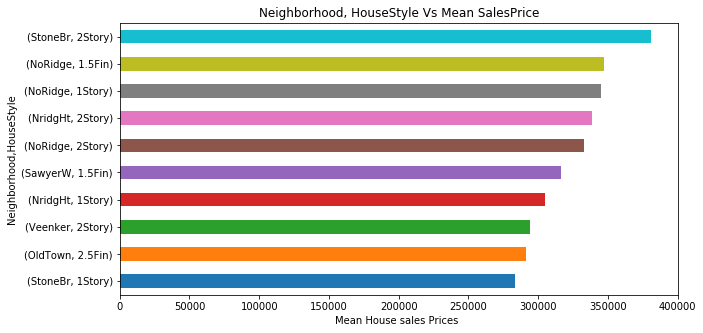

In [54]:
housing.groupby(['Neighborhood','HouseStyle'])['SalePrice'].mean().sort_values(ascending = True)[-10:].plot.barh(color=['C0','C1', 'C2','C3','C4', 'C5','C6','C7', 'C8', 'C9'], figsize = (10, 5))
plt.xlabel("Mean House sales Prices ")
plt.title("Neighborhood, HouseStyle Vs Mean SalesPrice")
plt.show()

### The above plot shows neighborhood and House Style with mean sale price, StoneBr with 2Story is the costliest


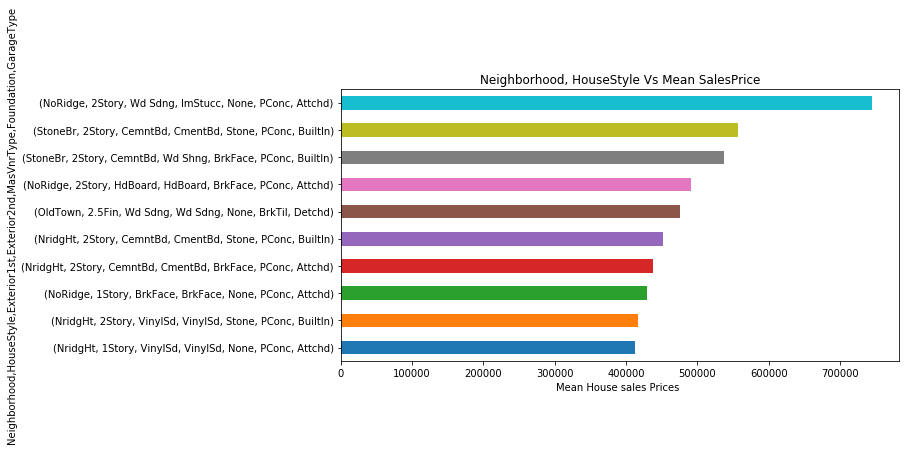

In [55]:
housing.groupby(['Neighborhood','HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType'])['SalePrice'].mean().sort_values(ascending = True)[-10:].plot.barh(color=['C0','C1', 'C2','C3','C4', 'C5','C6','C7', 'C8', 'C9'], figsize = (10, 5))
plt.xlabel("Mean House sales Prices ")
plt.title("Neighborhood, HouseStyle Vs Mean SalesPrice")
plt.show()

### NoRidge 2Story is very costly with additional features like Wd Sdng, ImStrucc, PConc, Attchd Garage Type


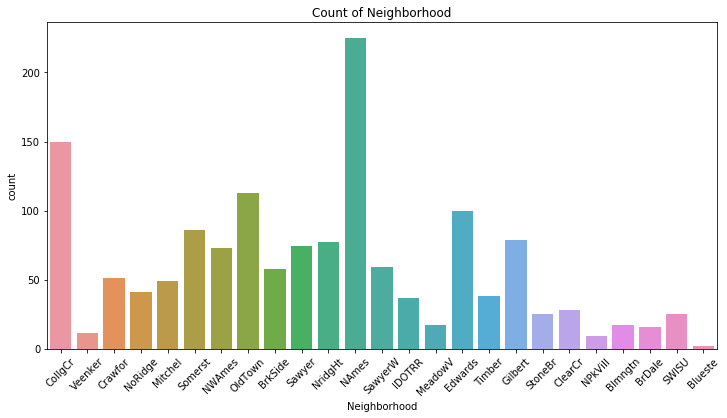

In [56]:
plt.figure(figsize = (12,6))
sns.countplot(housing['Neighborhood'].values,data = housing )
plt.xticks(rotation = 45)
plt.xlabel("Neighborhood")
plt.title("Count of Neighborhood")
plt.show()

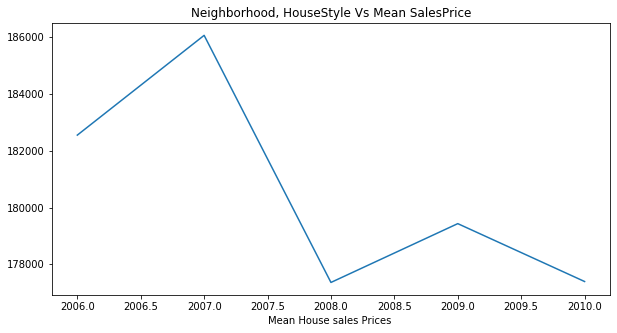

In [57]:
housing.groupby(['YrSold'])['SalePrice'].mean().plot(figsize = (10, 5))
plt.xlabel("Mean House sales Prices ")
plt.title("Neighborhood, HouseStyle Vs Mean SalesPrice")
plt.show()

### It can be seen that houses were sold at higher prices in the year 2007 then it decreased in 2008 then again it increased in 2009 with decrease later



### Heatmap and Correlation

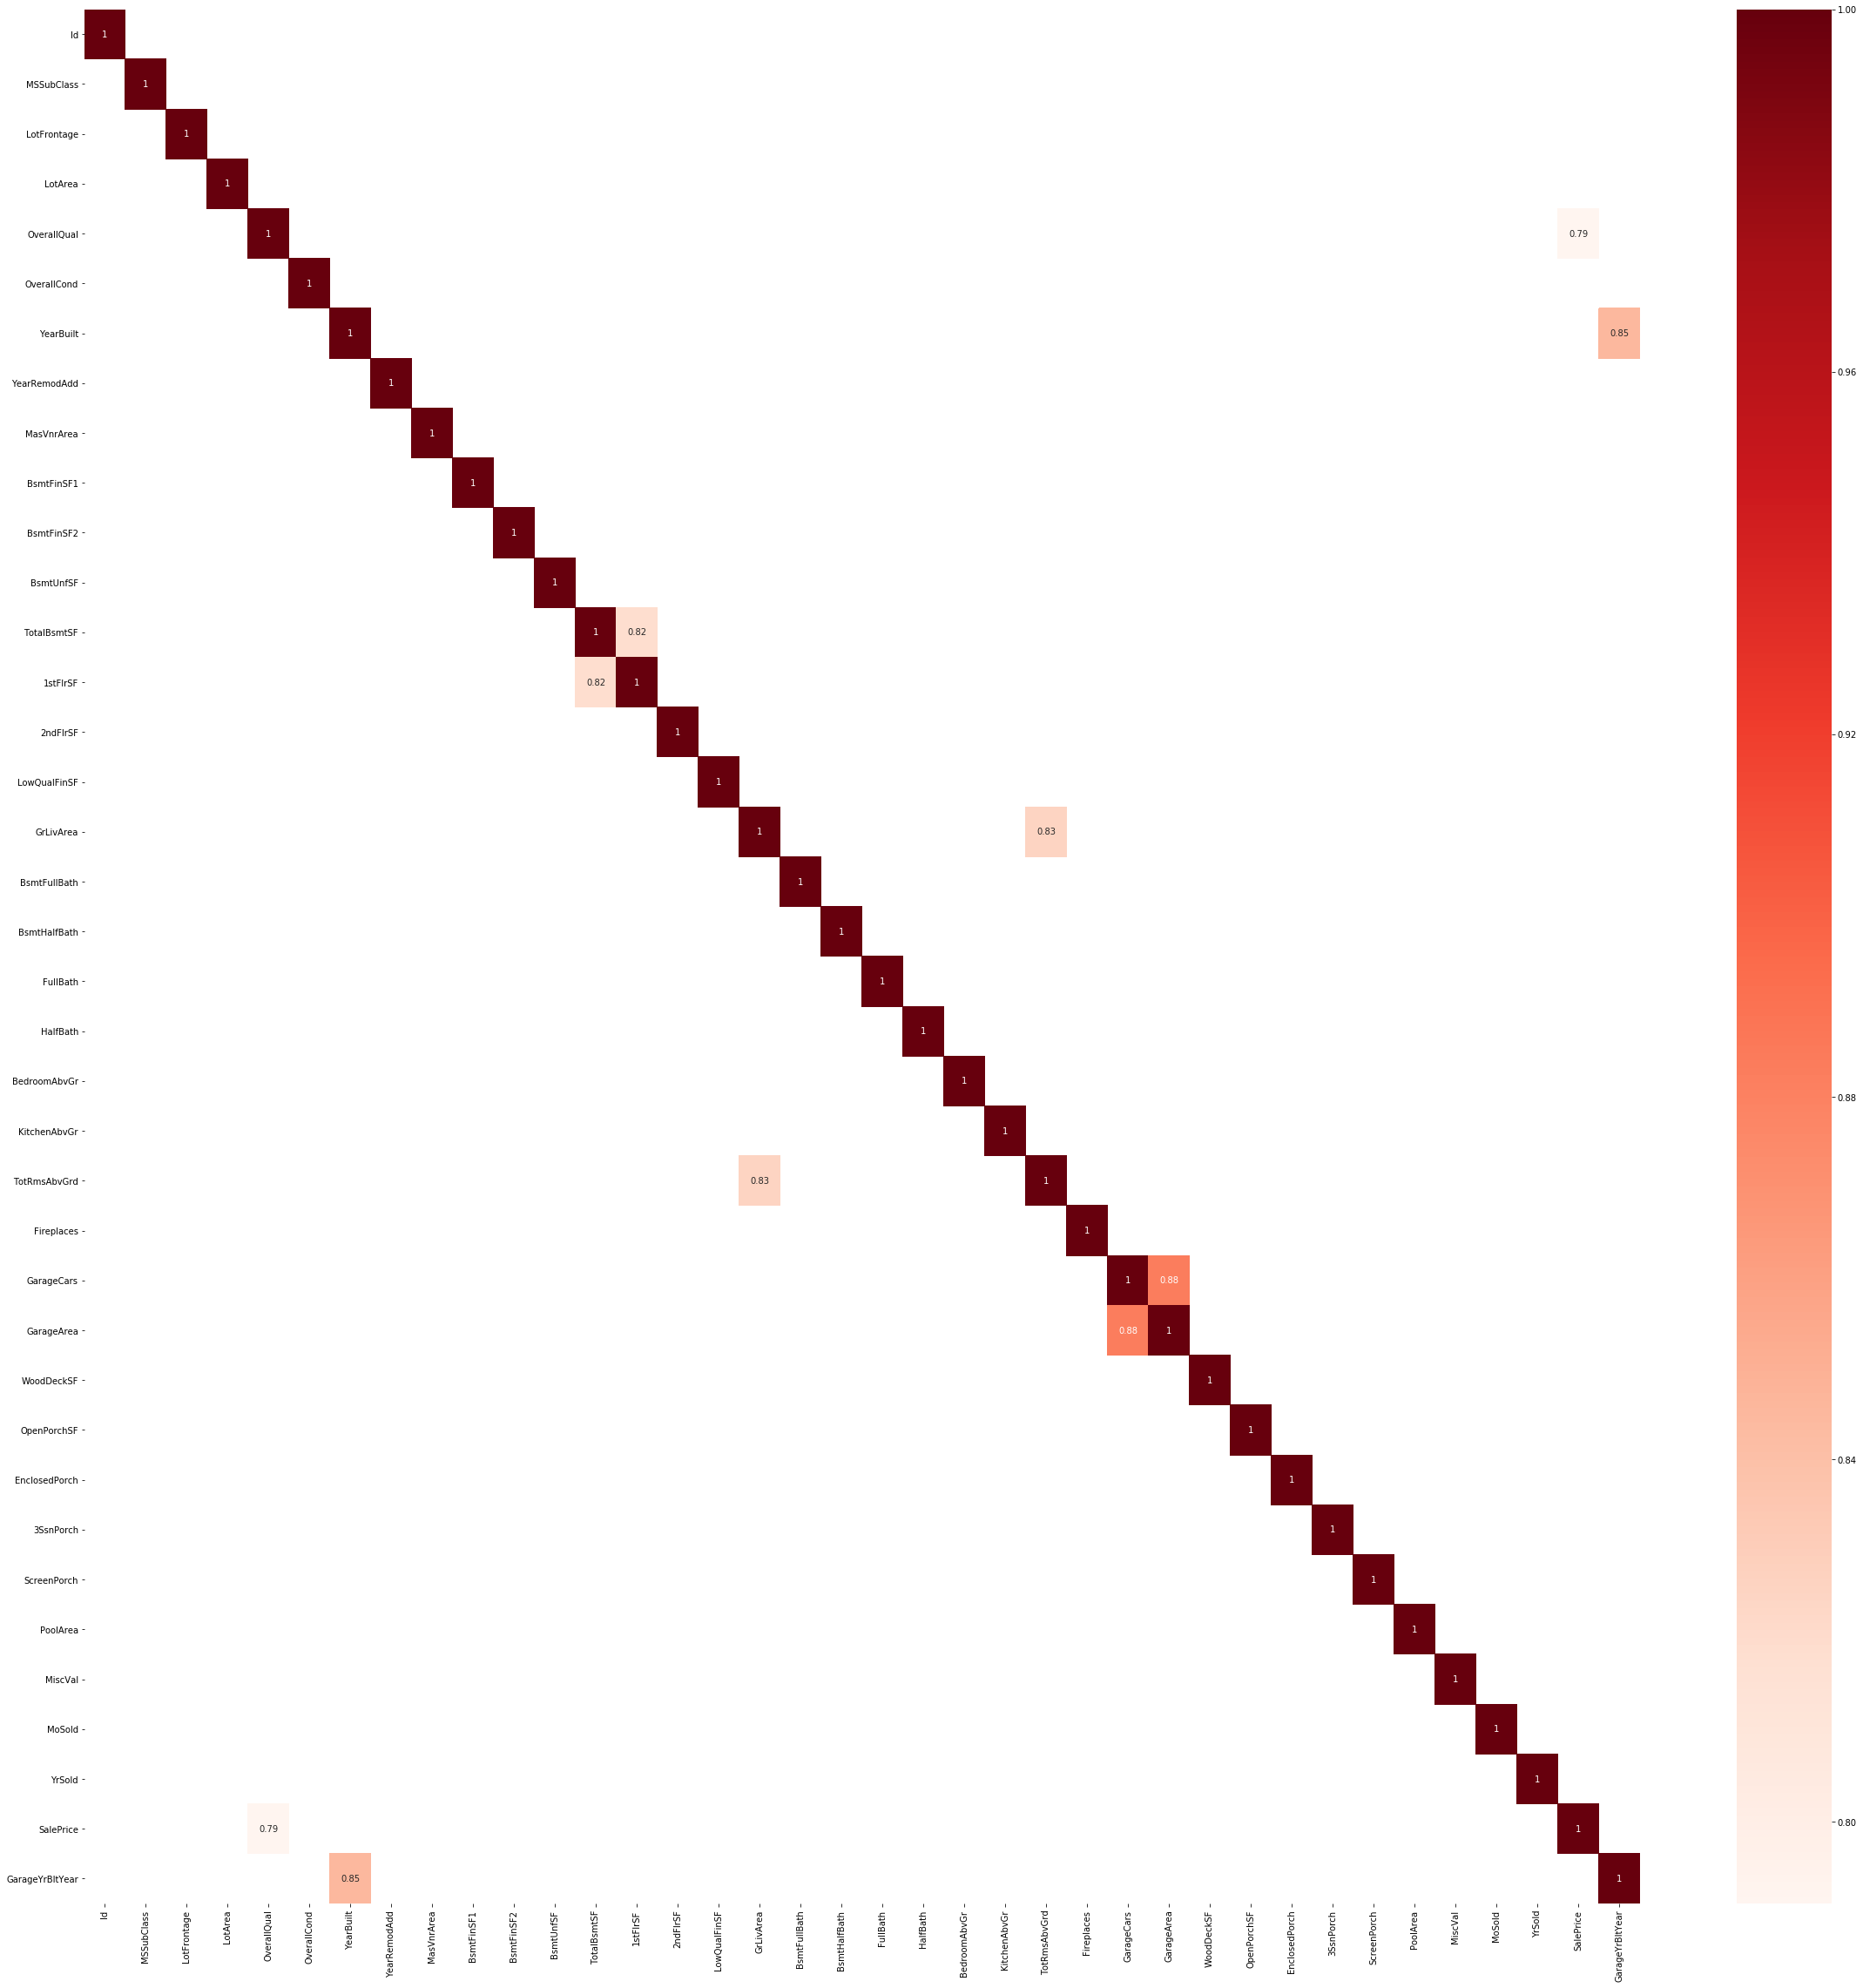

In [58]:
plt.figure(figsize = (40, 40))
sns.heatmap(housing.corr()[(housing.corr() > 0.79) | (housing.corr() < -0.79)], annot = True,  cmap = 'Reds', cbar = True)

In [59]:
# dropping highly correlated columns
housing.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'GarageYrBltYear'], axis = 1, inplace = True)

### Converting Categorical Variables to Dummy Variables

In [60]:
housing['MSSubClass'] = housing['MSSubClass'].astype('object')

In [61]:
cols = list(housing.columns)
dum = []
for i in cols:
    if housing[i].dtype == 'object':
        dum.append(i)

In [62]:
# Columns which are to be converted to dummies
print(dum)

['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']


In [63]:
for i in dum:
    
    housing = pd.get_dummies(housing, prefix = [i], columns = [i],  drop_first= False)
    
housing.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBase,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBase,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBase,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFire,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_NoGar,GarageFinish_RFn,GarageFinish_Unf
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,2,298,0,0,0,0,0,0,5,2007,181500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,2,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0

In [64]:
# Columns to be dropped
drop_dummy = ['MSSubClass_40', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_Blueste', 'HouseStyle_2.5Fin', 
              'Exterior1st_AsphShn', 'Exterior2nd_Other', 'MasVnrType_BrkCmn', 'ExterQual_Fa', 'Foundation_Wood',
              'BsmtQual_Fa', 'BsmtExposure_NoBase', 'BsmtFinType1_NoBase', 'HeatingQC_Po', 'KitchenQual_Fa', 'FireplaceQu_NoFire', 
              'GarageType_2Types', 'GarageFinish_NoGar']
housing.drop(drop_dummy, axis = 1, inplace = True)

In [65]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 160 entries, Id to GarageFinish_Unf
dtypes: float64(2), int64(31), uint8(127)
memory usage: 557.6 KB


In [66]:
year_feat = [feature for feature in housing.columns if 'Yr' in feature or 'Year' in feature]
year_feat

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [67]:
for i in year_feat:
    print(housing[i].value_counts())
    print('*'*50)

housing[year_feat].head()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64
**************************************************
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
**************************************************
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
**************************************************


,YearBuilt,YearRemodAdd,YrSold
0,2003,2003,2008
1,1976,1976,2007
2,2001,2002,2008
3,1915,1970,2006
4,2000,2000,2008


In [68]:
# Finding Actual years
for i in year_feat:
    housing[i] = 2020.0 - housing[i]

housing[year_feat].head()

,YearBuilt,YearRemodAdd,YrSold
0,17.0,17.0,12.0
1,44.0,44.0,13.0
2,19.0,18.0,12.0
3,105.0,50.0,14.0
4,20.0,20.0,12.0


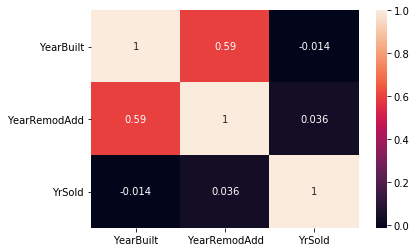

In [69]:
sns.heatmap(housing[year_feat].corr(), annot = True)

In [70]:
int_col = [col for col in housing.columns if housing[col].dtype == 'int64' or housing[col].dtype == 'float64']

# Function to plot Distplot
def distplot(col_names):
    plt.figure(figsize=(30,120))
    for i in enumerate(col_names): 
        ax = plt.subplot(15, 3, i[0]+1)
        sns.distplot(housing[i[1]],
                     bins = 15, 
                     axlabel = i[1].upper(), 
                     color = 'red', 
                     hist_kws={ "linewidth": 3,
                               "alpha": 1, "color": "orange"})
        plt.xticks(rotation = 20)
    return plt.show()

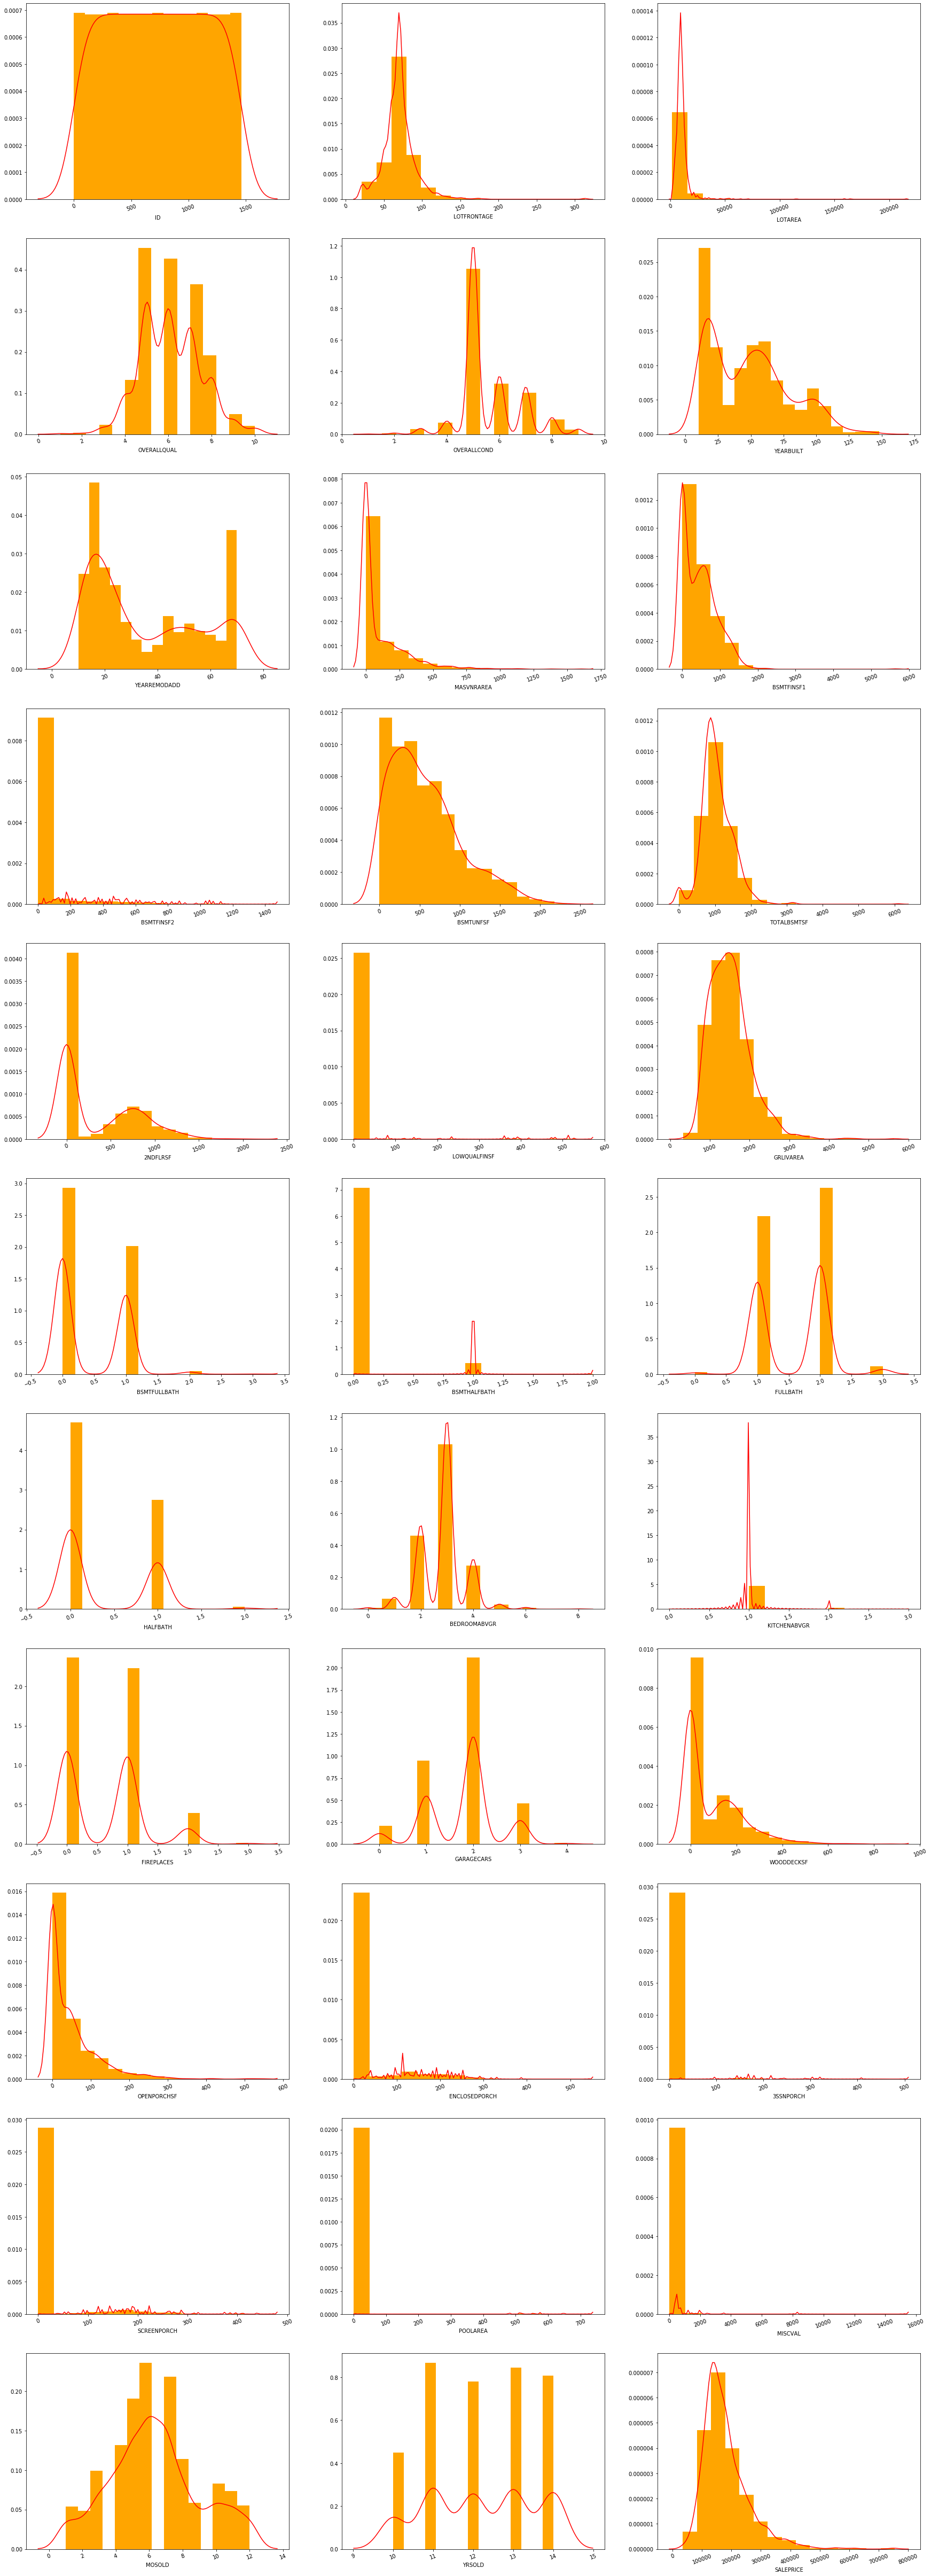

In [71]:
distplot(int_col)

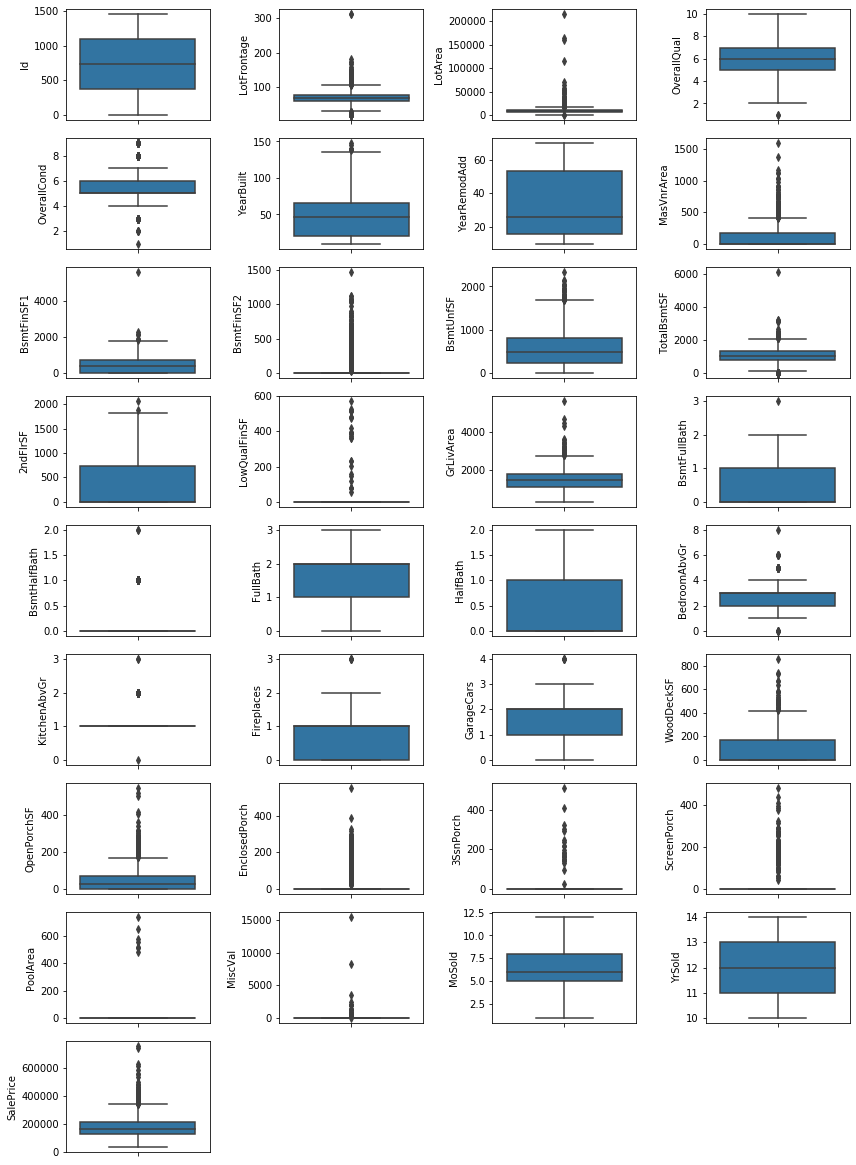

In [72]:
fig = plt.figure(figsize=(12,18))
for i, j in enumerate(int_col):
    fig.add_subplot(10,4,i+1)
    sns.boxplot(y=housing[j])

plt.tight_layout()
plt.show()

In [73]:
# Capping and visualizing Boxplot
def capping(col_names):
     
    i = 0
    fig = plt.figure(figsize=(12,18))
    for i, name in enumerate(col_names):
        fig.add_subplot(10,4,i+1)
        
        Q1 = housing[name].quantile(0.01)
        Q3 = housing[name].quantile(0.99)
        IQR = Q3 - Q1
    
        floor, ceil = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        housing[name] = housing[name].clip(floor, ceil)
                      
        sns.boxplot(y=housing[name])

        plt.tight_layout()
        
    return plt.show()

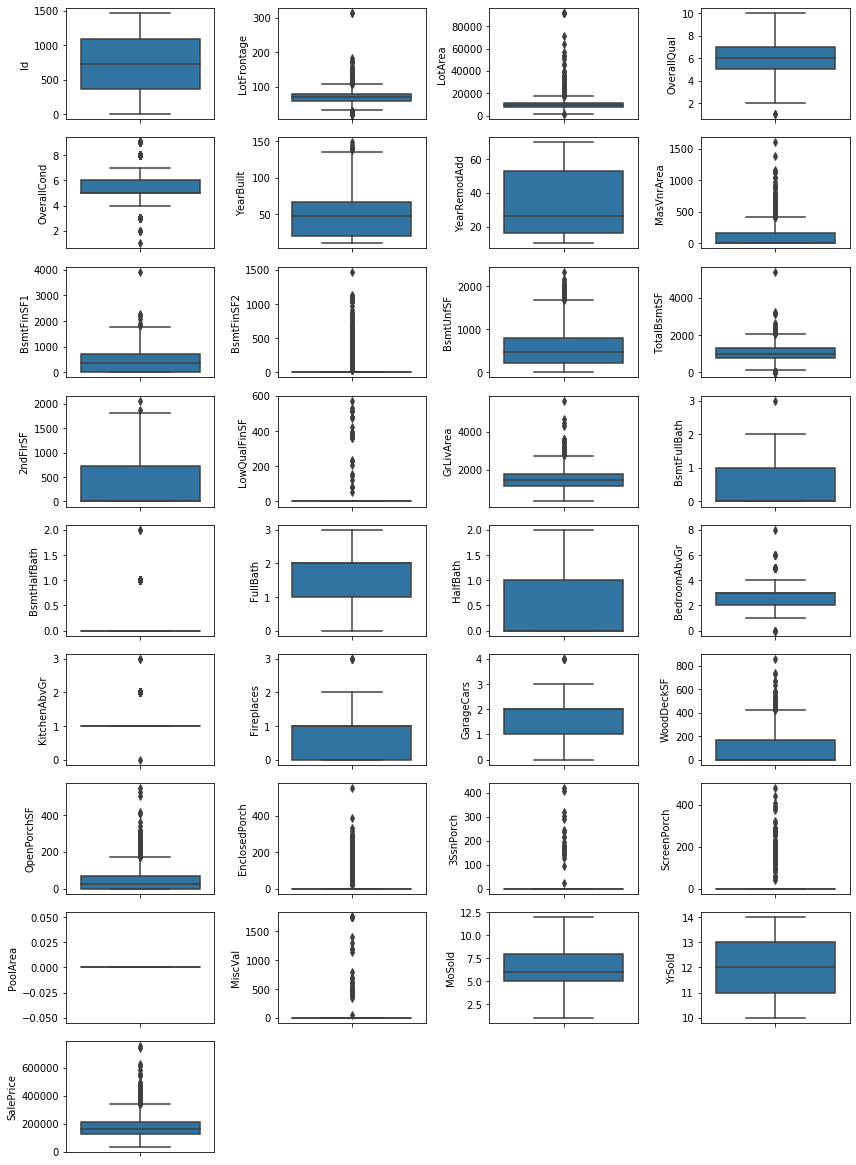

In [74]:
# Capping outliers
capping(int_col)

In [75]:
# Columns to be dropped after checking distribution and boxplot
to_drop2 = ['Id',  'BsmtFinSF2',  'LowQualFinSF',   'BsmtHalfBath',   'KitchenAbvGr',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold' ]


In [76]:
housing.drop(to_drop2, axis = 1, inplace = True)

In [77]:
housing.shape

(1460, 149)

### Checking Heatmap and Dropping Highly correlated values

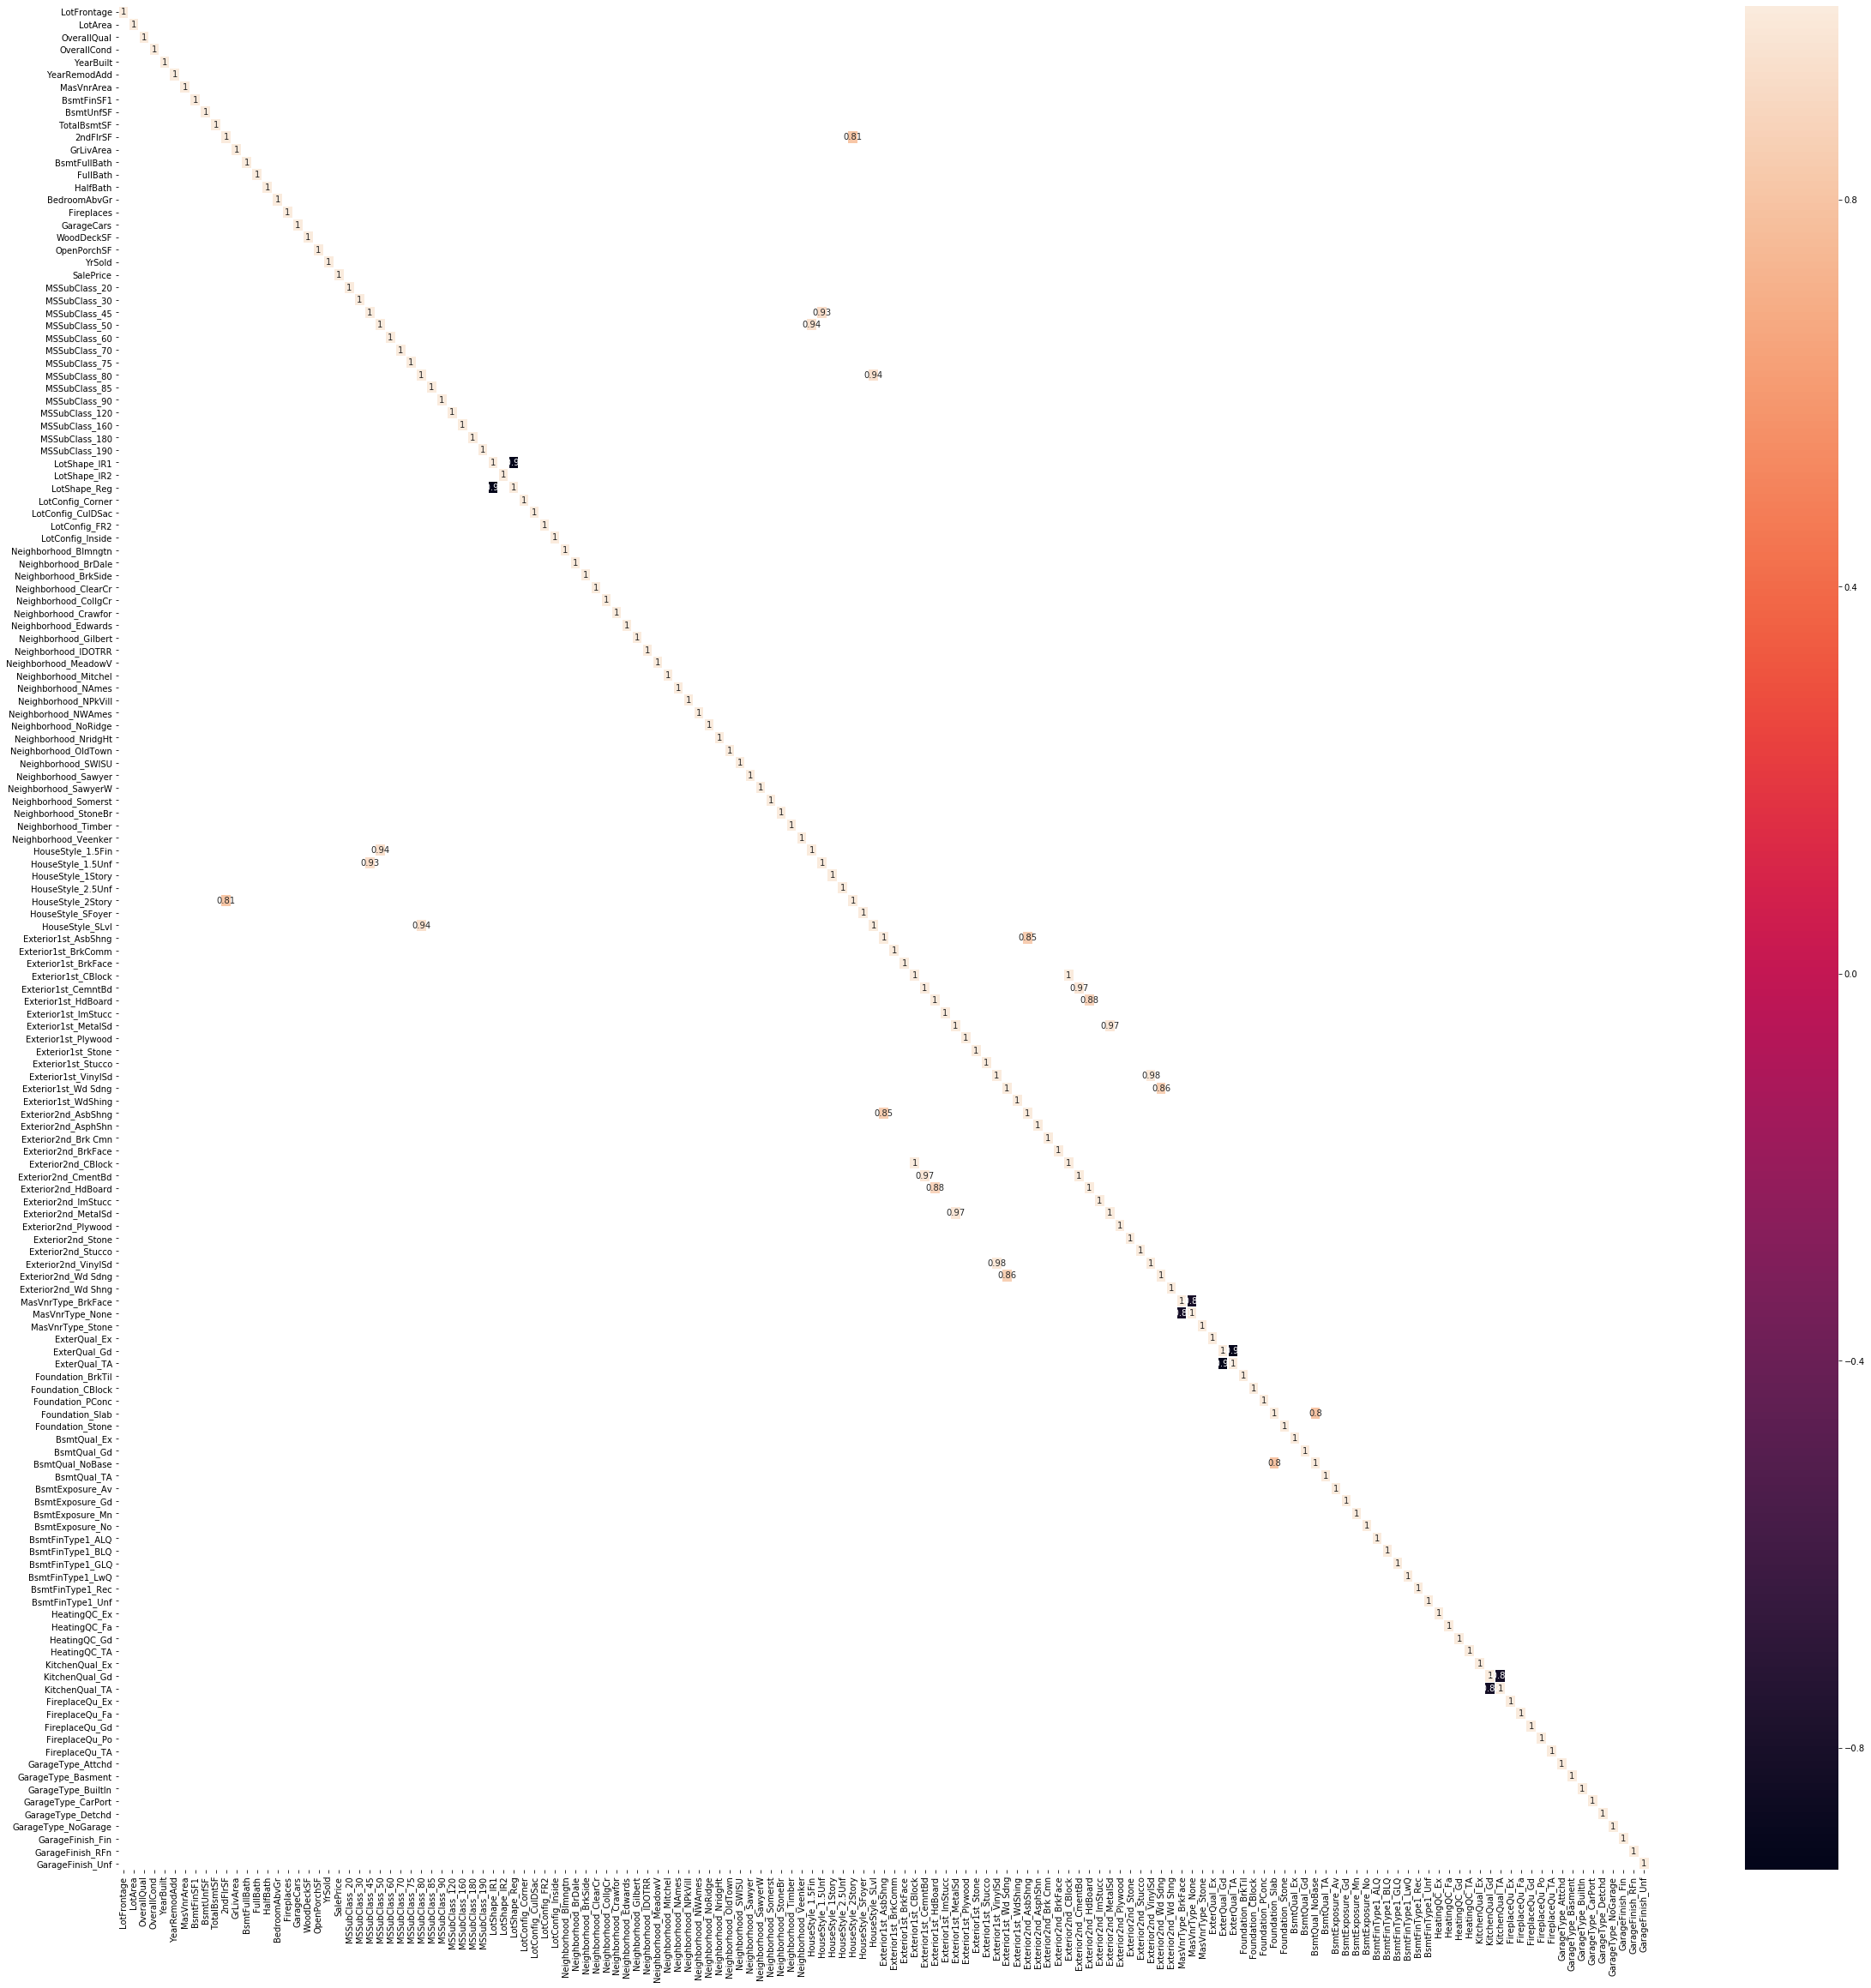

In [78]:
plt.figure(figsize = (40, 40))
sns.heatmap(housing.corr()[(housing.corr() > 0.8) | (housing.corr() < -0.80)], annot = True,  cbar = True, linewidths=.5)

In [79]:
# Highly correlated Columns to be dropped
to_drop_3 = [ 'LotShape_Reg','HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
'HouseStyle_2Story','HouseStyle_SLvl','Exterior2nd_AsbShng', 'Exterior2nd_CBlock','Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd','Exterior2nd_Wd Sdng', 'KitchenQual_TA','ExterQual_TA',
'BsmtQual_NoBase','MasVnrType_None']


In [80]:
housing.drop(to_drop_3, axis = 1, inplace = True)

In [81]:
housing.shape

(1460, 133)

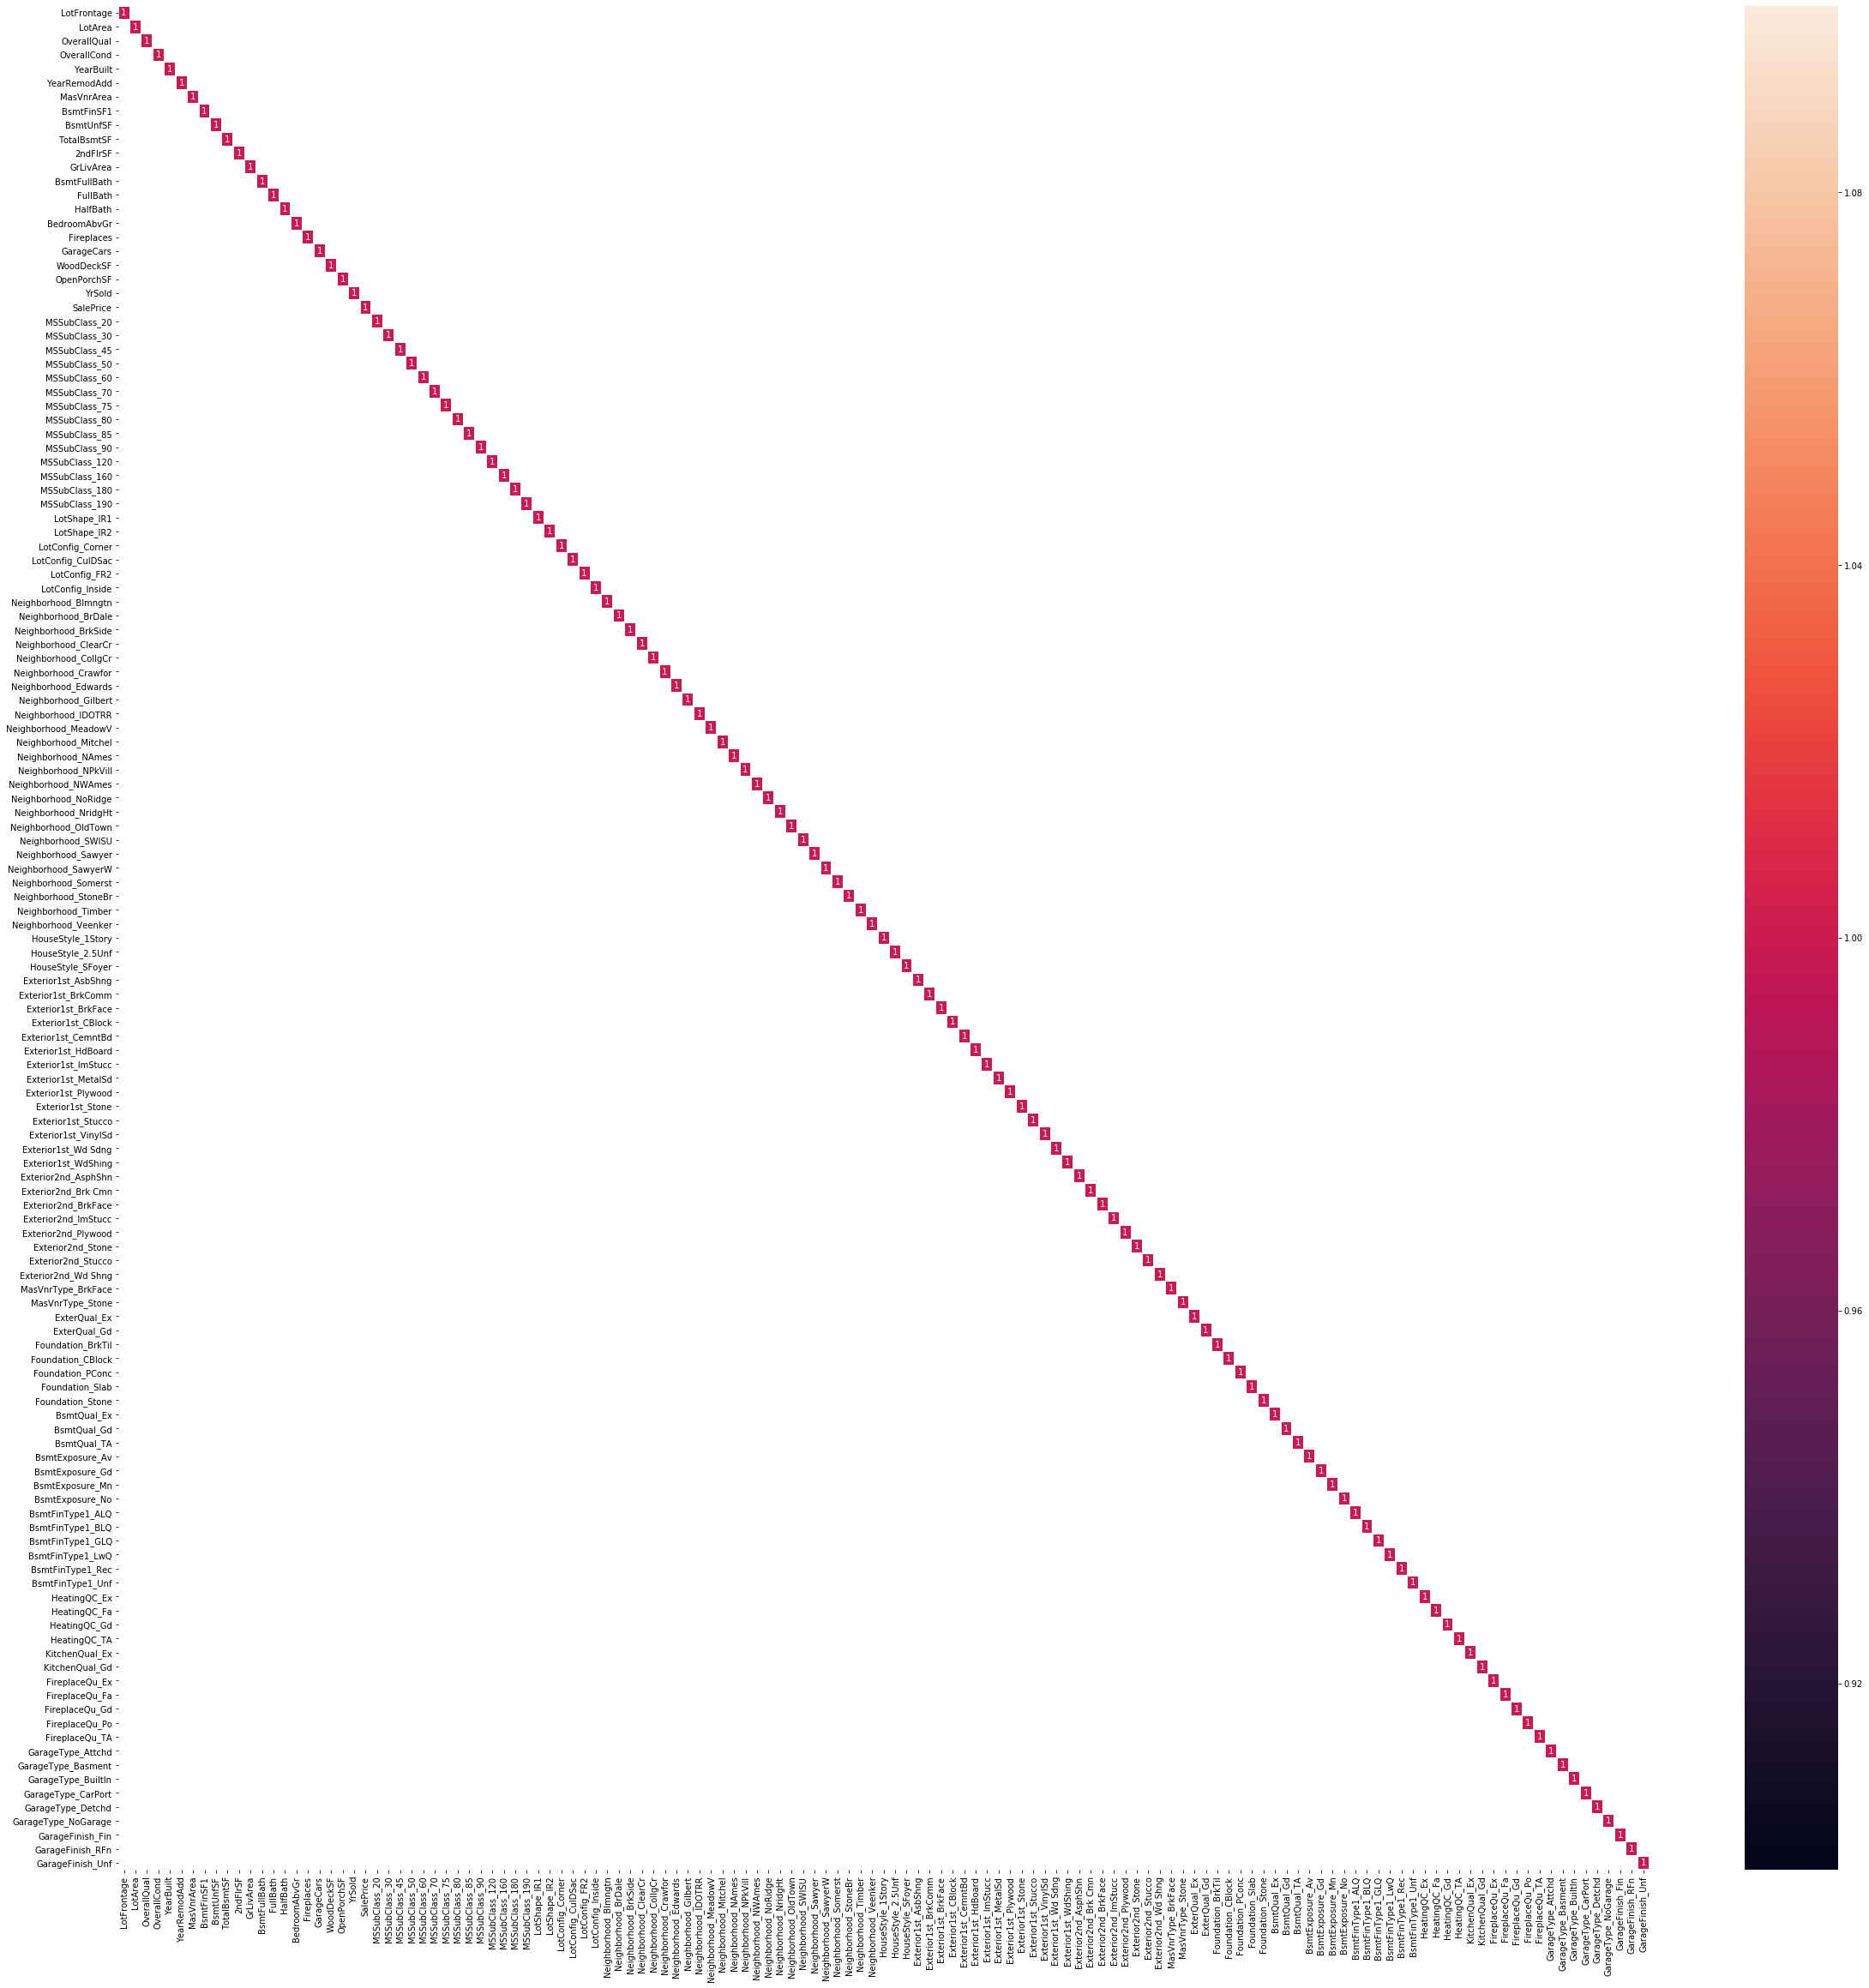

In [82]:
plt.figure(figsize = (40, 40))
sns.heatmap(housing.corr()[(housing.corr() > 0.8) | (housing.corr() < -0.80)], annot = True,  cbar = True, linewidths=.5)

In [83]:
housing.shape

(1460, 133)

### Sale Price Distribution Transformation

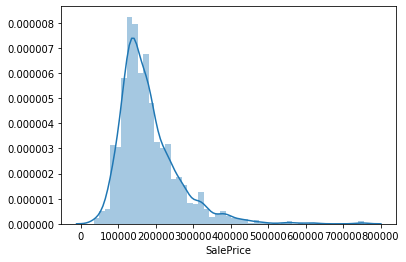

In [84]:
sns.distplot(housing['SalePrice'])
plt.show()

In [85]:
# Using Power Transformation Box-Cox
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'box-cox')
sale_price = pt.fit_transform(housing[['SalePrice']])

sale_price

array([[ 0.57115402],
       [ 0.22762687],
       [ 0.74186844],
       ...,
       [ 1.170202  ],
       [-0.38713619],
       [-0.29307223]])

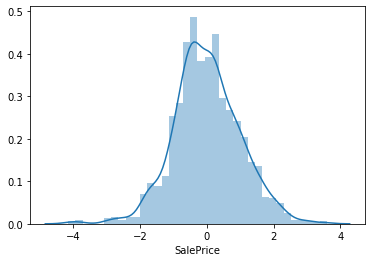

In [86]:
#Converting back to Data Frame

housing['SalePrice'] = pd.DataFrame(sale_price)
sns.distplot(housing['SalePrice'])

In [87]:
housing['SalePrice'].min(), housing['SalePrice'].max()

(-4.150039518958308, 3.589750337738486)

### Making a copy of DataFrame

In [88]:
house = housing.copy()

In [89]:
house.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR1,LotShape_IR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_SFoyer,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Gd,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450.0,7,5,17.0,17.0,196.0,706.0,150,856.0,854,1710,1,2,1,3,0,2,0,61,12.0,0.571154,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,80.0,9600.0,6,8,44.0,44.0,0.0,978.0,284,1262.0,0,1262,0,2,0,3,1,2,298,0,13.0,0.227627,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,68.0,11250.0,7,5,19.0,18.0,162.0,486.0,434,920.0,866,1786,1,2,1,3,1,2,0,42,12.0,0.741868,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,60.0,9550.0,7,5,105.0,50.0,0.0,216.0,540,756.0,756,1717,1,1,0,3,1,3,0,35,14.0,-0.425386,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,84.0,14260.0,8,5,20.0,20.0,350.0,655.0,490,1145.0,1053,2198,1,2,1,4,1,3,192,84,12.0,1.015293,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [90]:
print(list(house.columns))

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotShape_IR1', 'LotShape_IR2', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_

In [91]:
scale_col = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice',]

In [92]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

house_scaled = standard_scaler.fit_transform(house[scale_col])
house[scale_col] = pd.DataFrame(house_scaled, columns = scale_col)
house.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR1,LotShape_IR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_SFoyer,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Gd,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,-0.229464,-0.264723,0.651479,-0.517200,-1.050994,-0.878668,0.514104,0.592714,-0.944591,-0.463806,1.161852,0.370333,1.107810,0.789741,1.227585,0.163779,-0.951226,0.311725,-0.752176,0.216503,-0.138777,0.571154,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0.452299,-0.101861,-0.071836,2.179628,-0.156734,0.429577,-0.570750,1.204470,-0.641228,0.473341,-0.795163,-0.482512,-0.819964,0.789741,-0.761621,0.163779,0.600495,0.311725,1.626195,-0.704483,0.614439,0.227627,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,-0.093112,0.131812,0.651479,-0.517200,-0.984752,-0.830215,0.325915,0.097911,-0.301643,-0.316079,1.189351,0.515013,1.107810,0.789741,1.227585,0.163779,0.600495,0.311725,-0.752176,-0.070361,-0.138777,0.741868,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,-0.456719,-0.108942,0.651479,-0.517200,1.863632,0.720298,-0.570750,-0.509346,-0.061670,-0.694631,0.937276,0.383659,1.107810,-1.026041,-0.761621,0.163779,0.600495,1.650307,-0.752176,-0.176048,1.367655,-0.425386,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,0.634103,0.558087,1.374795,-0.517200,-0.951632,-0.733308,1.366489,0.478010,-0.174865,0.

In [93]:
house.shape

(1460, 133)

In [94]:
y = house['SalePrice'].values
X = house.drop('SalePrice', axis = 1)

### Splitting data to train and test

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021, 132), (439, 132), (1021,), (439,))

# Model Building and Evaluation

In [97]:
# Linear Regression Using Statsmodel
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                 -1.655009
LotFrontage           -0.041535
LotArea                0.028466
OverallQual            0.192512
OverallCond            0.104372
                         ...   
GarageType_Detchd      0.356528
GarageType_NoGarage   -0.291778
GarageFinish_Fin      -0.454906
GarageFinish_RFn      -0.422686
GarageFinish_Unf      -0.485640
Length: 133, dtype: float64

In [98]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     66.27
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:26:35   Log-Likelihood:                -229.86
No. Observations:                1021   AIC:                             719.7
Df Residuals:                     891   BIC:                             1360.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.6550      0.655     -2.525      0.012      -2.941      -0.369
LotFrontage             -0.0415      0.014     -2.892      0.004      -0.070      -0.013
LotArea                  0.0285      0.015      1.959      0.050   -5.61e-05       0.057
OverallQual              0.1925      0.023      8.457      0.000       0.148       0.237
OverallCond              0.1044      0.014      7.215      0.000       0.076       0.133
YearBuilt               -0.0802      0.038     -2.090      0.037      -0.156      -0.005
YearRemodAdd            -0.0495      0.019     -2.643      0.008      -0.086      -0.013
MasVnrArea              -0.0297      0.018     -1.655      0.098      -0.065       0.006
BsmtFinSF1               0.0040      0.036      0.111      0.912      -0.067       0.075
BsmtUnfSF                0.0308      0.037      0.832      0.405      -0.042       0.104
TotalBsmtSF             -0.0245      0.043     -0.573      0.567      -0.108       0.059
2ndFlrSF                 0.0229      0.044      0.520      0.603      -0.064       0.109
GrLivArea                0.1840      0.039      4.741      0.000       0.108       0.260
BsmtFullBath             0.0583      0.016      3.619      0.000       0.027       0.090
FullBath                 0.0755      0.020      3.813      0.000       0.037       0.114
HalfBath                 0.0750      0.017      4.462      0.000       0.042       0.108
BedroomAbvGr             0.0566      0.017      3.355      0.001       0.023       0.090
Fireplaces               0.0319      0.027      1.178      0.239      -0.021       0.085
GarageCars               0.1266      0.020      6.442      0.000       0.088       0.165
WoodDeckSF               0.0212      0.011      1.842      0.066      -0.001       0.044
OpenPorchSF             -0.0087      0.012     -0.752      0.452      -0.031       0.014
YrSold                   0.0136      0.011      1.222      0.222      -0.008       0.035
MSSubClass_20           -0.2290      0.247     -0.925      0.355      -0.715       0.257
MSSubClass_30           -0.5587      0.252     -2.218      0.027      -1.053      -0.064
MSSubClass_45           -0.3226      0.292     -1.106      0.269      -0.895       0.250
MSSubClass_50           -0.2438      0.265     -0.922      0.357      -0.763       0.275
MSSubClass_60           -0.3813      0.267     -1.428      0.154      -0.905       0.143
MSSubClass_70           -0.2120      0.267     -0.795      0.427      -0.735       0.311
MSSubClass_75           -0.0279      0.292     -0.096      0.924      -0.601       0.546
MSSubClass_80           -0.3082      0.276     -1.116      0.265      -0.850       0.234
MSSubClass_85           -0.3044      0.307     -0.993      0.321      -0.906       0.297
MSSubClass_90           -0.3790      0.262     -1.449    

### RFE
Recursive feature elimination

In [99]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [100]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [102]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 47),
 ('LotArea', False, 54),
 ('OverallQual', True, 1),
 ('OverallCond', False, 15),
 ('YearBuilt', False, 28),
 ('YearRemodAdd', False, 44),
 ('MasVnrArea', False, 53),
 ('BsmtFinSF1', False, 83),
 ('BsmtUnfSF', False, 63),
 ('TotalBsmtSF', False, 82),
 ('2ndFlrSF', False, 64),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 38),
 ('FullBath', False, 21),
 ('HalfBath', False, 24),
 ('BedroomAbvGr', False, 37),
 ('Fireplaces', False, 48),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 58),
 ('OpenPorchSF', False, 77),
 ('YrSold', False, 72),
 ('MSSubClass_20', False, 49),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_45', False, 55),
 ('MSSubClass_50', False, 52),
 ('MSSubClass_60', False, 25),
 ('MSSubClass_70', False, 26),
 ('MSSubClass_75', False, 9),
 ('MSSubClass_80', False, 57),
 ('MSSubClass_85', False, 56),
 ('MSSubClass_90', False, 30),
 ('MSSubClass_120', True, 1),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 12),
 ('MSSubClass_190', Fals

### Selecting top 50 Features

In [103]:
# Selecting top 50 Features
col = X_train.columns[rfe.support_]
print(list(col))

['OverallQual', 'GrLivArea', 'GarageCars', 'MSSubClass_30', 'MSSubClass_120', 'MSSubClass_160', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1Story', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior2nd_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType

In [104]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'MSSubClass_20', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_180',
       'MSSubClass_190', 'LotShape_IR1', 'LotShape_IR2',
       'Neighborhood_Blmngtn', 'Neighborhood_BrDale', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'HouseStyle_2.5Unf',
       'HouseStyle_SFoyer', 'Exterior1st_AsbShng', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Ex

In [105]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [106]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_const = sm.add_constant(X_train_rfe)

In [107]:
lm = sm.OLS(y_train, X_train_rfe_const).fit()   # Running the linear model

In [108]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:26:37   Log-Likelihood:                -380.30
No. Observations:                1021   AIC:                             860.6
Df Residuals:                     971   BIC:                             1107.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.2196 

### Ridge and Lasso Regression
Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [109]:
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,  8.0, 9.0, 10.0,
                    11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0,
                    20, 50, 100, 200,  ]}


ridge = Ridge(random_state = 42)

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 8.0, 9.0,
                                   10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0,
                                   17.0, 20, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [110]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010601,0.000490,0.0044,0.001855,0.0001,{'alpha': 0.0001},-0.252548,-0.295869,-0.280379,-0.235949,-0.243923,-0.261734,0.022712,14,-0.244352,-0.225726,-0.239734,-0.247392,-0.246158,-0.240672,0.007913
1,0.019001,0.008415,0.0048,0.000748,0.001,{'alpha': 0.001},-0.252543,-0.295865,-0.280377,-0.235948,-0.243917,-0.261730,0.022713,13,-0.244351,-0.225731,-0.239737,-0.247393,-0.246159,-0.240674,0.007911
2,0.015001,0.002450,0.0060,0.001095,0.01,{'alpha': 0.01},-0.252492,-0.295825,-0.280362,-0.235931,-0.243856,-0.261693,0.022716,12,-0.244348,-0.225780,-0.239758,-0.247405,-0.246162,-0.240691,0.007894
3,0.011001,0.002450,0.0044,0.000800,0.05,{'alpha': 0.05},-0.252283,-0.295742,-0.280515,-0.235868,-0.243587,-0.261599,0.022790,11,-0.244331,-0.225979,-0.239840,-0.247473,-0.246172,-0.240759,0.007829
4,0.008801,0.000748,0.0036,0.000800,0.1,{'alpha': 0.1},-0.252053,-0.295659,-0.280769,-0.235810,-0.243252,-0.261509,0.022893,10,-0.244341,-0.226201,-0.239919,-0.247549,-0.246222,-0.240846,0.007764


In [111]:
print("The best value of Alpha is: ", model_cv.best_params_)

The best value of Alpha is:  {'alpha': 0.7}


### Ridge Best value for alpha is 1

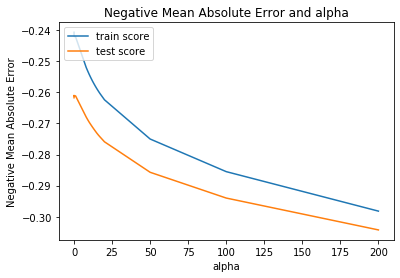

In [112]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [113]:
alpha = 1.0
ridge = Ridge(alpha=alpha, random_state = 42)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.30238937,  0.28298353,  0.14761183, -0.47777246, -0.24991346,
       -0.37298287,  0.14366751,  0.26154363,  0.0321141 ,  0.12542195,
        0.18052745,  0.46957499,  0.18996524,  0.53591619,  0.23462779,
        0.1239138 ,  0.27822102,  0.15338242,  0.39524761,  0.53082635,
        0.117786  ,  0.15037513,  0.41266154,  0.59008557,  0.31437295,
        0.42281132,  0.15382824, -0.60553205,  0.25096328, -0.1894092 ,
        0.24821878,  0.41547937,  0.21736312,  0.19490728,  0.30694004,
        0.20404717,  0.24697726,  0.11126242,  0.17113324,  0.03560842,
        0.33099184, -0.06387147,  0.18325381,  0.13465962,  0.34496306,
        0.16786602,  0.35126388,  0.26645052,  0.02260261, -0.10838325])

In [114]:
from collections import Counter
ridge_dict_coeff = Counter(dict(zip(list(col), list(ridge.coef_))))
print(ridge_dict_coeff)
                           

Counter({'Neighborhood_StoneBr': 0.5900855658915355, 'Neighborhood_Crawfor': 0.5359161860340113, 'Neighborhood_NridgHt': 0.5308263503520736, 'Neighborhood_ClearCr': 0.4695749945174739, 'Neighborhood_Veenker': 0.4228113217775621, 'BsmtExposure_Gd': 0.41547937351099773, 'Neighborhood_Somerst': 0.4126615385654828, 'Neighborhood_NoRidge': 0.3952476076102243, 'GarageType_BuiltIn': 0.3512638839303314, 'GarageType_Attchd': 0.34496305774318914, 'HeatingQC_Ex': 0.3309918376571413, 'Neighborhood_Timber': 0.3143729497417361, 'BsmtFinType1_ALQ': 0.30694003917677193, 'OverallQual': 0.30238936590263404, 'GrLivArea': 0.2829835316573734, 'Neighborhood_NPkVill': 0.2782210218322426, 'GarageType_Detchd': 0.26645052302577016, 'LotConfig_CulDSac': 0.26154363174193057, 'Exterior1st_BrkFace': 0.25096327947193214, 'BsmtExposure_Av': 0.2482187819108133, 'BsmtFinType1_GLQ': 0.24697726348799603, 'Neighborhood_Gilbert': 0.23462779189912977, 'BsmtExposure_Mn': 0.2173631197801972, 'BsmtFinType1_BLQ': 0.204047169475

### Top  ridge variables  and their coefficients

In [115]:
top_ridge= {    'Neighborhood_Crawfor': 0.4971256583603821, 
                'Neighborhood_StoneBr': 0.47703191234705894,
                'BsmtExposure_Gd': 0.421073051679782, 
                'HeatingQC_Ex': 0.379639610549814,
                'Neighborhood_ClearCr': 0.3428874430554477,
                'Neighborhood_Veenker': 0.3313016210869, 
                'MSSubClass_30': -0.34829960165253315,
                'MSSubClass_180': -0.4512158839002349,
                'MSSubClass_160': -0.5402172159851387, 
            'Exterior1st_BrkComm': -0.6106969887031823}

In [116]:
top_ridge = pd.DataFrame({'variables': list(top_ridge.keys()), 'coeff': list(top_ridge.values())})
top_ridge

,variables,coeff
0,Neighborhood_Cra...,0.497126
1,Neighborhood_Sto...,0.477032
2,BsmtExposure_Gd,0.421073
3,HeatingQC_Ex,0.379640
4,Neighborhood_Cle...,0.342887
5,Neighborhood_Vee...,0.331302
6,MSSubClass_30,-0.348300
7,MSSubClass_180,-0.451216
8,MSSubClass_160,-0.540217
9,Exterior1st_BrkComm,-0.610697


### Evaluation

In [117]:
# Predicting
from sklearn.metrics import mean_squared_error , r2_score

y_pred_train_ridge = ridge.predict(X_train_rfe)
y_pred_test_ridge = ridge.predict(X_test[list(col)])


print("Train R2 Score", r2_score(y_train, y_pred_train_ridge))
print("Test R2 Score", r2_score(y_test, y_pred_test_ridge))
print('*'*100)
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)))) 

Train R2 Score 0.8721111756589588
Test R2 Score 0.8623285985906566
****************************************************************************************************
Root Mean Square Error train = 0.35276639186151143
Root Mean Square Error test = 0.382270128642792


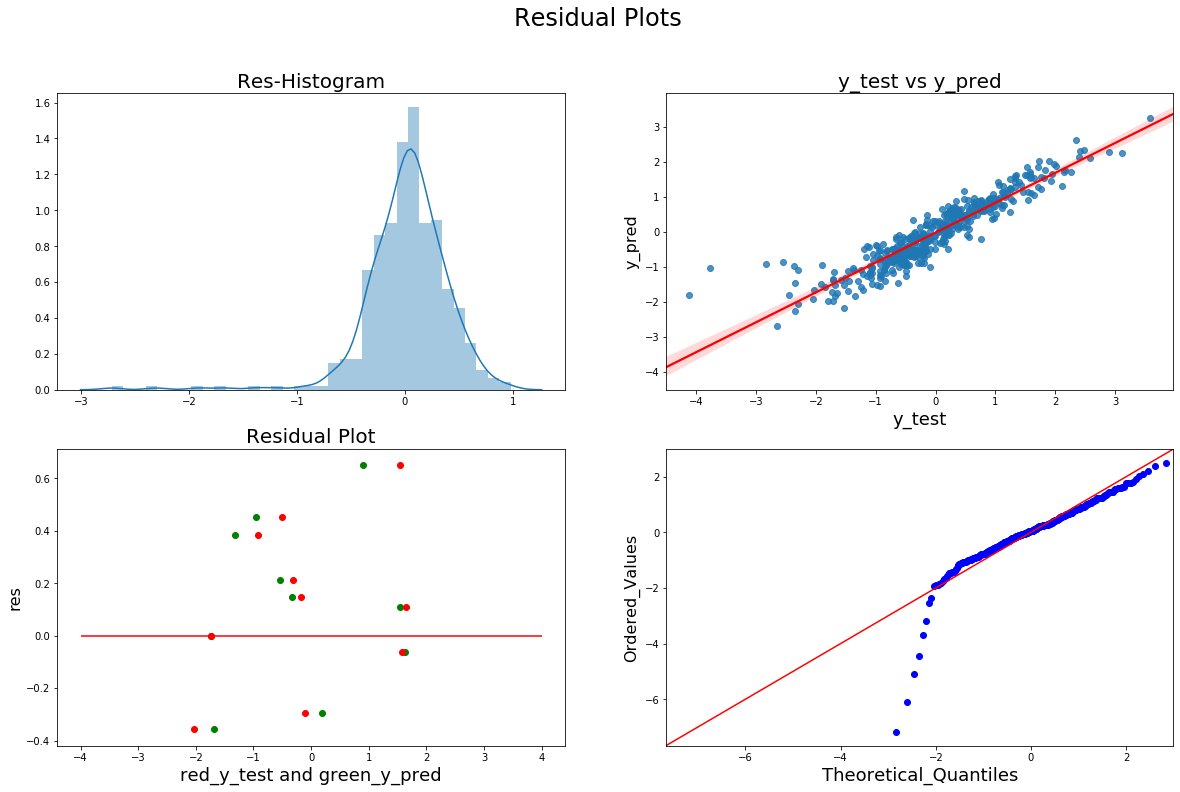

In [118]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred_test_ridge
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred_test_ridge, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = -4, xmax = 4, color = 'red')
plt.scatter(y_pred_test_ridge[:10], res[:10], c = 'green')
plt.scatter(y_test[:10], res[:10], c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =  plt.subplot(2,2,4)
fig = sm.qqplot(res, fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

### Lasso Regression

In [119]:
lasso = Lasso(random_state = 42)
folds = 5
# cross validation
params = {'alpha': [0.0001, 0.001,0.005, 0.006, 0.007, 0.008, 0.009, 0.01,0.02, 0.03, 
                    0.04, 0.05, 0.1,   0.2, 0.3, 0.4, 0.5, 0.6, ]}
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.006, 0.007, 0.008,
                                   0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [120]:
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.126807,0.016118,0.0024,0.00049,0.0001,{'alpha': 0.0001},-0.251553,-0.297416,-0.282762,-0.236654,-0.242552,-0.262188,0.023727,1,-0.244688,-0.226423,-0.240058,-0.247727,-0.246407,-0.241061,0.007765
1,0.012801,0.002315,0.0026,0.00049,0.001,{'alpha': 0.001},-0.256423,-0.305187,-0.290460,-0.246166,-0.237359,-0.267119,0.026203,2,-0.251368,-0.233323,-0.244109,-0.252948,-0.252347,-0.246819,0.007461
2,0.007600,0.001020,0.0022,0.00040,0.005,{'alpha': 0.005},-0.281120,-0.327344,-0.304780,-0.263730,-0.261795,-0.287754,0.025109,3,-0.273779,-0.259036,-0.272275,-0.278208,-0.280889,-0.272837,0.007555
3,0.007200,0.001166,0.0024,0.00049,0.006,{'alpha': 0.006},-0.283313,-0.331481,-0.308793,-0.268573,-0.265454,-0.291523,0.025174,4,-0.277257,-0.264402,-0.276741,-0.283805,-0.285702,-0.277581,0.007472
4,0.007000,0.001265,0.0022,0.00040,0.007,{'alpha': 0.007},-0.285621,-0.335752,-0.311906,-0.273101,-0.268686,-0.295013,0.025324,5,-0.281685,-0.268624,-0.280709,-0.288669,-0.290542,-0.282046,0.007722


In [121]:
print("The best value of Alpha is: ",model_cv2.best_params_, model_cv2.best_score_)

The best value of Alpha is:  {'alpha': 0.0001} -0.26218763836083914


### Lasso Best Value of alpha is 0.0001

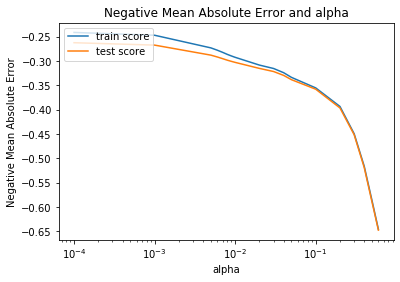

In [122]:
# plotting mean test and train scoes with alpha 
cv_results2['param_alpha'] = cv_results2['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results2['param_alpha'], cv_results2['mean_train_score'])
plt.plot(cv_results2['param_alpha'], cv_results2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [123]:
alpha = 0.0001

lasso = Lasso(alpha=alpha, random_state = 42)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
lasso.coef_

array([ 2.92967133e-01,  2.83116451e-01,  1.44866789e-01, -4.98733966e-01,
       -2.58069856e-01, -3.90356893e-01,  2.02219834e-01,  3.15815037e-01,
        8.27991249e-02,  1.83955837e-01,  1.88809771e-01,  4.99485123e-01,
        2.10535982e-01,  5.61541454e-01,  2.58469421e-01,  1.36896824e-01,
        3.36690707e-01,  1.71965694e-01,  4.38882571e-01,  5.76861090e-01,
        1.22381087e-01,  1.69098107e-01,  4.47672888e-01,  6.51389314e-01,
        3.45744230e-01,  4.85397690e-01,  1.56619696e-01, -8.56979557e-01,
        2.56236827e-01, -2.28623965e-01,  3.09504647e-01,  4.80254091e-01,
        2.79041503e-01,  2.54701157e-01,  2.68523421e-01,  1.70573447e-01,
        2.07274413e-01,  7.39228335e-02,  1.37063472e-01, -4.14359648e-05,
        5.03448144e-01,  1.11973466e-01,  3.54877549e-01,  3.06647985e-01,
        4.10128998e-01,  2.43998868e-01,  4.20201362e-01,  3.36692790e-01,
        9.00095085e-02, -1.02936976e-01])

In [125]:
from collections import Counter
lasso_dict_coeff = Counter(dict(zip(list(col), list(lasso.coef_))))
print(lasso_dict_coeff)

Counter({'Neighborhood_StoneBr': 0.6513893136100894, 'Neighborhood_NridgHt': 0.5768610896352793, 'Neighborhood_Crawfor': 0.5615414537438252, 'HeatingQC_Ex': 0.503448144347612, 'Neighborhood_ClearCr': 0.4994851229734073, 'Neighborhood_Veenker': 0.4853976903546248, 'BsmtExposure_Gd': 0.48025409102348343, 'Neighborhood_Somerst': 0.4476728878158928, 'Neighborhood_NoRidge': 0.43888257098019345, 'GarageType_BuiltIn': 0.4202013622696664, 'GarageType_Attchd': 0.4101289983267602, 'HeatingQC_Gd': 0.35487754896386564, 'Neighborhood_Timber': 0.34574422996394877, 'GarageType_Detchd': 0.3366927902576546, 'Neighborhood_NPkVill': 0.3366907065816151, 'LotConfig_CulDSac': 0.31581503722967236, 'BsmtExposure_Av': 0.3095046474393652, 'HeatingQC_TA': 0.30664798475728805, 'OverallQual': 0.2929671327893353, 'GrLivArea': 0.28311645109321604, 'BsmtExposure_Mn': 0.2790415029414146, 'BsmtFinType1_ALQ': 0.26852342075897656, 'Neighborhood_Gilbert': 0.25846942060097344, 'Exterior1st_BrkFace': 0.25623682711193346, 'B

### Top Lasso variables and their coefficients

In [126]:
top_lasso = {'Neighborhood_StoneBr': 0.5142276972872114, 
             'Neighborhood_Crawfor': 0.5137105332960173, 
             'BsmtExposure_Gd': 0.50872173237077, 
             'HeatingQC_Ex': 0.3888083463970592, 
             'Neighborhood_Veenker': 0.36738641360135615,
             'GarageType_Attchd': 0.3569161865949941,
            'MSSubClass_30': -0.3631060489196896, 
             'MSSubClass_180': -0.5224398584782926, 
             'MSSubClass_160': -0.563876135985138, 
             'Exterior1st_BrkComm': -0.860858027516559}


In [127]:
top_lasso = pd.DataFrame({'variables': list(top_lasso.keys()), 'coeff': list(top_lasso.values())})
top_lasso

,variables,coeff
0,Neighborhood_Sto...,0.514228
1,Neighborhood_Cra...,0.513711
2,BsmtExposure_Gd,0.508722
3,HeatingQC_Ex,0.388808
4,Neighborhood_Vee...,0.367386
5,GarageType_Attchd,0.356916
6,MSSubClass_30,-0.363106
7,MSSubClass_180,-0.522440
8,MSSubClass_160,-0.563876
9,Exterior1st_BrkComm,-0.860858


### Evaluation

In [128]:
# Predicting
from sklearn.metrics import mean_squared_error , r2_score

y_pred_train_lasso = lasso.predict(X_train_rfe)
y_pred_test_lasso = lasso.predict(X_test[list(col)])


print("Train R2 Score", r2_score(y_train, y_pred_train_lasso))
print("Test R2 Score", r2_score(y_test, y_pred_test_lasso))
print('*'*100)
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))) 

Train R2 Score 0.8729488528047878
Test R2 Score 0.8611289365270718
****************************************************************************************************
Root Mean Square Error train = 0.3516091764889864
Root Mean Square Error test = 0.38393205788963797


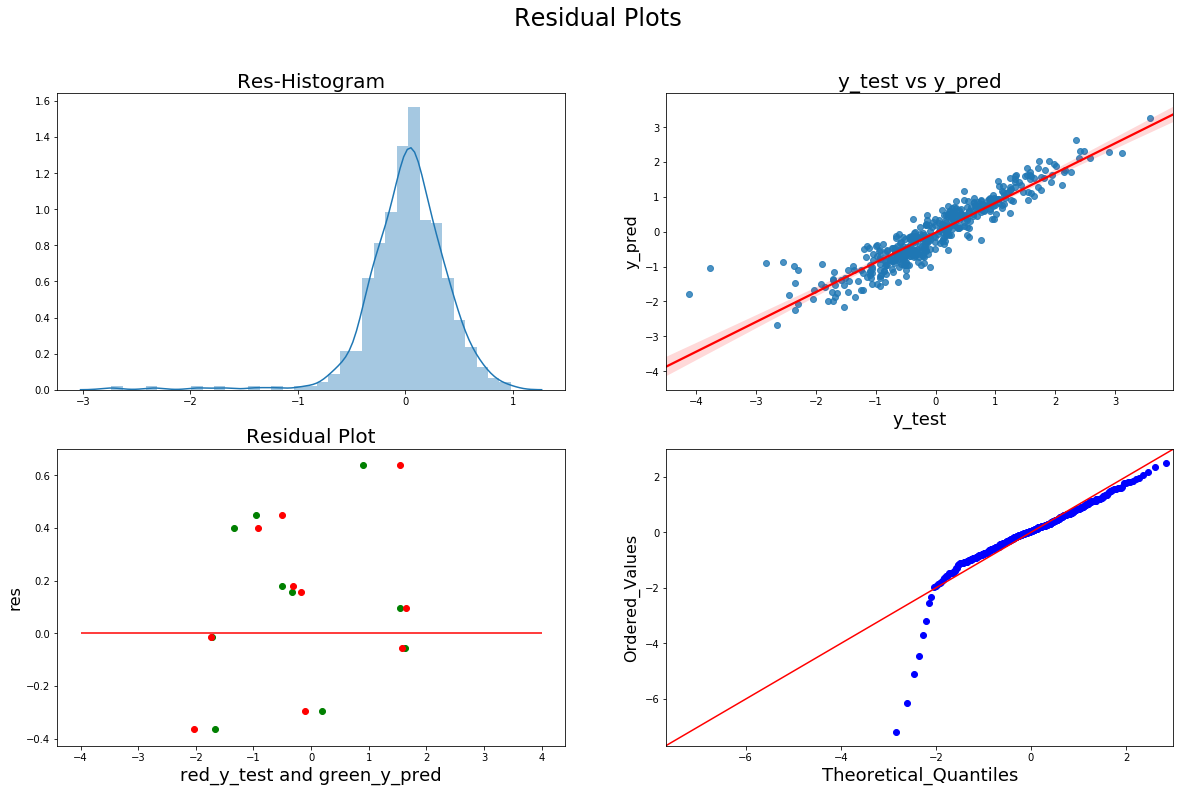

In [129]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred_test_lasso
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred_test_lasso, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = -4, xmax = 4, color = 'red')
plt.scatter(y_pred_test_lasso[:10], res[:10], c = 'green')
plt.scatter(y_test[:10], res[:10], c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =  plt.subplot(2,2,4)
fig = sm.qqplot(res, fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

## Final Regression Coefficients and variables

### Ridge_Model  Alpha  = 1

In [130]:
print(top_ridge)

             variables     coeff
0  Neighborhood_Cra...  0.497126
1  Neighborhood_Sto...  0.477032
2      BsmtExposure_Gd  0.421073
3         HeatingQC_Ex  0.379640
4  Neighborhood_Cle...  0.342887
5  Neighborhood_Vee...  0.331302
6        MSSubClass_30 -0.348300
7       MSSubClass_180 -0.451216
8       MSSubClass_160 -0.540217
9  Exterior1st_BrkComm -0.610697


In [131]:
print(list(top_ridge['variables'].values))

['Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'BsmtExposure_Gd', 'HeatingQC_Ex', 'Neighborhood_ClearCr', 'Neighborhood_Veenker', 'MSSubClass_30', 'MSSubClass_180', 'MSSubClass_160', 'Exterior1st_BrkComm']


#### Top 5 Variable are : ['Exterior1st_BrkComm', 'MSSubClass_160','Neighborhood_Crawfor','Neighborhood_StoneBr','MSSubClass_180',]

### Lasso_Model Alpha = 0.0001

In [132]:
print(top_lasso)

             variables     coeff
0  Neighborhood_Sto...  0.514228
1  Neighborhood_Cra...  0.513711
2      BsmtExposure_Gd  0.508722
3         HeatingQC_Ex  0.388808
4  Neighborhood_Vee...  0.367386
5    GarageType_Attchd  0.356916
6        MSSubClass_30 -0.363106
7       MSSubClass_180 -0.522440
8       MSSubClass_160 -0.563876
9  Exterior1st_BrkComm -0.860858


In [133]:
print(list(top_lasso['variables'].values))

['Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'BsmtExposure_Gd', 'HeatingQC_Ex', 'Neighborhood_Veenker', 'GarageType_Attchd', 'MSSubClass_30', 'MSSubClass_180', 'MSSubClass_160', 'Exterior1st_BrkComm']


#### Top 5 ridge :['Exterior1st_BrkComm', 'MSSubClass_160','MSSubClass_180','Neighborhood_StoneBr','Neighborhood_Crawfor',]

# Subjective Questions and Answers

### Question 1

- What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

- What will be the most important predictor variables after the change is implemented?


Optimal value of Alpha :
    
- Ridge = 1
- Lasso = 0.0001



In [134]:
# Doubling Alpha
new_ridge = 2

ridge2 = Ridge(alpha = new_ridge )

ridge2.fit(X_train_rfe, y_train)
ridge2.coef_

array([ 0.31182276,  0.2825031 ,  0.15102917, -0.45474502, -0.24020171,
       -0.35479651,  0.08831125,  0.21041992, -0.0159468 ,  0.06991984,
        0.16770747,  0.43606076,  0.16621012,  0.50751215,  0.20649499,
        0.10705598,  0.21919857,  0.13142671,  0.34869682,  0.48159832,
        0.10956022,  0.12690908,  0.37418981,  0.52678233,  0.27981252,
        0.3618587 ,  0.1502488 , -0.4595101 ,  0.24069532, -0.14663795,
        0.22582389,  0.38867742,  0.19349644,  0.17353892,  0.29285142,
        0.18582731,  0.23495998,  0.09535556,  0.15227935,  0.02026305,
        0.26578012, -0.13015543,  0.11891383,  0.0697631 ,  0.29040525,
        0.10288789,  0.29308806,  0.20512703, -0.03595733, -0.11245773])

In [135]:
ridge_dict_coeff = Counter(dict(zip(list(col), list(ridge.coef_))))
print(ridge_dict_coeff)

Counter({'Neighborhood_StoneBr': 0.5900855658915355, 'Neighborhood_Crawfor': 0.5359161860340113, 'Neighborhood_NridgHt': 0.5308263503520736, 'Neighborhood_ClearCr': 0.4695749945174739, 'Neighborhood_Veenker': 0.4228113217775621, 'BsmtExposure_Gd': 0.41547937351099773, 'Neighborhood_Somerst': 0.4126615385654828, 'Neighborhood_NoRidge': 0.3952476076102243, 'GarageType_BuiltIn': 0.3512638839303314, 'GarageType_Attchd': 0.34496305774318914, 'HeatingQC_Ex': 0.3309918376571413, 'Neighborhood_Timber': 0.3143729497417361, 'BsmtFinType1_ALQ': 0.30694003917677193, 'OverallQual': 0.30238936590263404, 'GrLivArea': 0.2829835316573734, 'Neighborhood_NPkVill': 0.2782210218322426, 'GarageType_Detchd': 0.26645052302577016, 'LotConfig_CulDSac': 0.26154363174193057, 'Exterior1st_BrkFace': 0.25096327947193214, 'BsmtExposure_Av': 0.2482187819108133, 'BsmtFinType1_GLQ': 0.24697726348799603, 'Neighborhood_Gilbert': 0.23462779189912977, 'BsmtExposure_Mn': 0.2173631197801972, 'BsmtFinType1_BLQ': 0.204047169475

### Most important predictor variable for Ridge
New Coefficients

> `new_ridge_coeff = {  'Neighborhood_Crawfor'      : 0.5483, 
                        'Neighborhood_StoneBr'      : 0.4840, 
                        'BsmtExposure_Gd'           : 0.41654, 
                        'Neighborhood_ClearCr'      : 0.37531, 
                        'HeatingQC_Ex'              : 0.37205, 
                        'Neighborhood_Veenker'      : 0.35701, 
                        'MSSubClass_30'             : -0.3781, 
                        'MSSubClass_180'            : -0.4518,
                        'MSSubClass_160'            : -0.5536, 
                        'Exterior1st_BrkComm'       : -0.6172}`
                   

In [136]:
# Previous Coefficients
top_ridge

,variables,coeff
0,Neighborhood_Cra...,0.497126
1,Neighborhood_Sto...,0.477032
2,BsmtExposure_Gd,0.421073
3,HeatingQC_Ex,0.379640
4,Neighborhood_Cle...,0.342887
5,Neighborhood_Vee...,0.331302
6,MSSubClass_30,-0.348300
7,MSSubClass_180,-0.451216
8,MSSubClass_160,-0.540217
9,Exterior1st_BrkComm,-0.610697


### We can see that the value of coefficients for some vaariables has decreased, a few variables have increased '

In [137]:
new_lasso = 0.0002
lasso = Lasso(alpha = new_lasso)
        
lasso.fit(X_train_rfe, y_train) 
lasso.coef_

array([ 2.97004507e-01,  2.82938127e-01,  1.44180199e-01, -4.89485726e-01,
       -2.55982848e-01, -3.84325633e-01,  1.14731570e-01,  2.29717032e-01,
        0.00000000e+00,  9.62146735e-02,  1.81523744e-01,  4.90216704e-01,
        2.01341867e-01,  5.51441665e-01,  2.46752901e-01,  1.28116508e-01,
        3.07644577e-01,  1.61851194e-01,  4.22402082e-01,  5.58086131e-01,
        1.17185270e-01,  1.57860584e-01,  4.34174831e-01,  6.32309985e-01,
        3.32054035e-01,  4.64026547e-01,  1.55119497e-01, -8.13329895e-01,
        2.50490704e-01, -1.92150403e-01,  2.91431193e-01,  4.61974775e-01,
        2.60764473e-01,  2.38566410e-01,  2.69473859e-01,  1.66848295e-01,
        2.08346047e-01,  7.06305066e-02,  1.34045739e-01, -1.53301536e-04,
        3.88391192e-01, -0.00000000e+00,  2.39824589e-01,  1.92086388e-01,
        3.60046778e-01,  1.82933970e-01,  3.68480967e-01,  2.83151010e-01,
        3.04313295e-02, -1.05253009e-01])

In [138]:
lasso_dict_coeff = Counter(dict(zip(list(col), list(lasso.coef_))))
print(lasso_dict_coeff)

Counter({'Neighborhood_StoneBr': 0.6323099847140101, 'Neighborhood_NridgHt': 0.5580861314558607, 'Neighborhood_Crawfor': 0.5514416646068321, 'Neighborhood_ClearCr': 0.4902167042568251, 'Neighborhood_Veenker': 0.4640265465726799, 'BsmtExposure_Gd': 0.4619747752088025, 'Neighborhood_Somerst': 0.434174831311014, 'Neighborhood_NoRidge': 0.42240208243912303, 'HeatingQC_Ex': 0.3883911917348538, 'GarageType_BuiltIn': 0.3684809674181847, 'GarageType_Attchd': 0.3600467784656478, 'Neighborhood_Timber': 0.3320540348229958, 'Neighborhood_NPkVill': 0.307644577482501, 'OverallQual': 0.2970045070038257, 'BsmtExposure_Av': 0.2914311932485413, 'GarageType_Detchd': 0.2831510097862051, 'GrLivArea': 0.2829381267861753, 'BsmtFinType1_ALQ': 0.2694738586402696, 'BsmtExposure_Mn': 0.2607644732936573, 'Exterior1st_BrkFace': 0.25049070389563716, 'Neighborhood_Gilbert': 0.24675290117379797, 'HeatingQC_Gd': 0.23982458925054273, 'BsmtExposure_No': 0.23856641026849273, 'LotConfig_CulDSac': 0.22971703174000496, 'Bsm

### Most important predictor variable for Lasso

New Coefficients

> `new_lasso_coeff = {'Neighborhood_Crawfor' : 0.5606, 
                    'Neighborhood_StoneBr'   : 0.5115, 
                    'BsmtExposure_Gd'        : 0.4802, 
                    'Neighborhood_ClearCr'   : 0.3842, 
                    'Neighborhood_Veenker'   : 0.3791,
                    'HeatingQC_Ex'           : 0.3723, 
                    'MSSubClass_30'          : -0.3853, 
                    'MSSubClass_180'         : -0.4967, 
                    'MSSubClass_160'         : -0.5698, 
                    'Exterior1st_BrkComm'    : -0.8274}`

In [139]:
# Old Coeff
top_lasso

,variables,coeff
0,Neighborhood_Sto...,0.514228
1,Neighborhood_Cra...,0.513711
2,BsmtExposure_Gd,0.508722
3,HeatingQC_Ex,0.388808
4,Neighborhood_Vee...,0.367386
5,GarageType_Attchd,0.356916
6,MSSubClass_30,-0.363106
7,MSSubClass_180,-0.522440
8,MSSubClass_160,-0.563876
9,Exterior1st_BrkComm,-0.860858


### Here also the value of coefficients has increased. Some new variables are in the top now.

In [140]:
# Predicting
from sklearn.metrics import mean_squared_error , r2_score

y_pred_train_ridge2 = ridge.predict(X_train_rfe)
y_pred_test_ridge2 = ridge.predict(X_test[list(col)])

train_r2_ridge2 = r2_score(y_train, y_pred_train_ridge2)
test_r2_ridge2 = r2_score(y_test, y_pred_test_ridge2)

print("Train R2 Score", round(train_r2_ridge2, 4) )
print("Test R2 Score", round(test_r2_ridge2, 4))
print('*'*100)

train_mse_ridge2 = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge2))
test_mse_ridge2 = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge2))

print('Root Mean Square Error train = ' + str(round(train_mse_ridge2, 4)))
print('Root Mean Square Error test = ' + str(round(test_mse_ridge2, 4)) )

Train R2 Score 0.8721
Test R2 Score 0.8623
****************************************************************************************************
Root Mean Square Error train = 0.3528
Root Mean Square Error test = 0.3823


In [141]:
# Predicting
from sklearn.metrics import mean_squared_error , r2_score

y_pred_train_lasso2 = lasso.predict(X_train_rfe)
y_pred_test_lasso2 = lasso.predict(X_test[list(col)])

train_r2_lasso2 = r2_score(y_train, y_pred_train_lasso2)
test_r2_lasso2 = r2_score(y_test, y_pred_test_lasso2)

print("Train R2 Score", round(train_r2_lasso2, 4))
print("Test R2 Score", round(test_r2_lasso2, 4))
print('*'*100)

train_mse_lasso2 = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso2))
test_mse_lasso2 = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso2))

print('Root Mean Square Error train = ' + str(round(train_mse_lasso2, 4)))
print('Root Mean Square Error test = ' + str(round(test_mse_lasso2, 4))) 

Train R2 Score 0.8725
Test R2 Score 0.8618
****************************************************************************************************
Root Mean Square Error train = 0.3522
Root Mean Square Error test = 0.3829


#### On comparing R2 Score

#### Lasso
- Original = Train R2 - 0.8756
- New        Train R2 - 0.8754

>There is a slight decrease in Train R2 Score


#### Lasso
- Original = Test R2 - 0.8602
- New      = Test R2 - 0.8611

> There is a slight improvement in Test R2 Score

. Similar pattern is observed in Ridge Reggression

#### Ridge
- Original = Train R2 - 0.8751
- New        Train R2 - 0.8751

> No change in Train R2



#### Ridge
- Original = Test R2 - 0.8614
- New      = Test R2 - 0.8615

> There is a slight improvement in Test R2 Score

Thank you